In [1]:
import connectorx as cx
import pandas as pd
import numpy as np
import os
import duckdb
from datetime import datetime
import glob
import multiprocessing as mp
from functools import partial
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
def Derive_sametime_Ret():
    # 导入必要的库
    import pandas as pd
    import os
    import duckdb
    from pandas import DataFrame
    
    # 创建空的DataFrame来存储所有结果
    all_ret = pd.DataFrame()

    start_date = '2021-05-18'  
    end_date = '2024-12-31'    
    
    skipped_dates = []  # 定义跳过日期的列表

    trading_dates = pd.date_range(start=start_date, end=end_date, freq='D')

    for date in trading_dates:
        # 修复日期格式
        date_str = pd.to_datetime(date).strftime('%Y%m%d')

        one_min_file = f"/data/HighFreqData/MinuteQuote/new_minute/one_minute/{date_str}.parquet"

        if not os.path.exists(one_min_file):
            print(f"跳过日期 {date_str}: 原始数据文件不存在")
            skipped_dates.append(date_str)
            continue

        conn = duckdb.connect(database=':memory:')

        try:
            daily_ret = conn.execute(f"""
            SELECT 
                security_code,
                EXP(SUM(LN(1 + minute_return))) AS cum_ret
            FROM '{one_min_file}'
            WHERE start_time >= 930
                AND start_time < 1030
            GROUP BY security_code
            """
            ).fetchdf()

            daily_ret['date'] = date

            # 正确的纵向拼接方式
            all_ret = pd.concat([all_ret, daily_ret], axis=0, ignore_index=True)
                
            print(f"处理完成日期: {date_str}, 当前累计记录数: {len(all_ret)}")
            
        except Exception as e:
            print(f"处理日期 {date_str} 时出错: {str(e)}")
            skipped_dates.append(date_str)
            
        finally:
            # 关闭连接
            conn.close()

    print(f"总共跳过 {len(skipped_dates)} 个日期")
    print(f"最终数据集大小: {all_ret.shape}")
    
    return all_ret


all_ret = Derive_sametime_Ret()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210518, 当前累计记录数: 4279


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210519, 当前累计记录数: 8559
处理完成日期: 20210520, 当前累计记录数: 12853


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210521, 当前累计记录数: 17148
跳过日期 20210522: 原始数据文件不存在
跳过日期 20210523: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210524, 当前累计记录数: 21441
处理完成日期: 20210525, 当前累计记录数: 25740


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210526, 当前累计记录数: 30044
处理完成日期: 20210527, 当前累计记录数: 34350
处理完成日期: 20210528, 当前累计记录数: 38659
跳过日期 20210529: 原始数据文件不存在
跳过日期 20210530: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210531, 当前累计记录数: 42970
处理完成日期: 20210601, 当前累计记录数: 47282
处理完成日期: 20210602, 当前累计记录数: 51597


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210603, 当前累计记录数: 55915
处理完成日期: 20210604, 当前累计记录数: 60234
跳过日期 20210605: 原始数据文件不存在
跳过日期 20210606: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210607, 当前累计记录数: 64553
处理完成日期: 20210608, 当前累计记录数: 68876


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210609, 当前累计记录数: 73200
处理完成日期: 20210610, 当前累计记录数: 77525


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210611, 当前累计记录数: 81856
跳过日期 20210612: 原始数据文件不存在
跳过日期 20210613: 原始数据文件不存在
跳过日期 20210614: 原始数据文件不存在
处理完成日期: 20210615, 当前累计记录数: 86184
处理完成日期: 20210616, 当前累计记录数: 90513


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210617, 当前累计记录数: 94847
处理完成日期: 20210618, 当前累计记录数: 99182
跳过日期 20210619: 原始数据文件不存在
跳过日期 20210620: 原始数据文件不存在
处理完成日期: 20210621, 当前累计记录数: 103513


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210622, 当前累计记录数: 107852


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210623, 当前累计记录数: 112192


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210624, 当前累计记录数: 116535


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210625, 当前累计记录数: 120883
跳过日期 20210626: 原始数据文件不存在
跳过日期 20210627: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210628, 当前累计记录数: 125235
处理完成日期: 20210629, 当前累计记录数: 129591


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210630, 当前累计记录数: 133949
处理完成日期: 20210701, 当前累计记录数: 138309
处理完成日期: 20210702, 当前累计记录数: 142671
跳过日期 20210703: 原始数据文件不存在
跳过日期 20210704: 原始数据文件不存在
处理完成日期: 20210705, 当前累计记录数: 147035


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210706, 当前累计记录数: 151404
处理完成日期: 20210707, 当前累计记录数: 155778
处理完成日期: 20210708, 当前累计记录数: 160156
处理完成日期: 20210709, 当前累计记录数: 164535
跳过日期 20210710: 原始数据文件不存在
跳过日期 20210711: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210712, 当前累计记录数: 168914


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210713, 当前累计记录数: 173295


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210714, 当前累计记录数: 177674


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210715, 当前累计记录数: 182053


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210716, 当前累计记录数: 186436
跳过日期 20210717: 原始数据文件不存在
跳过日期 20210718: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210719, 当前累计记录数: 190818
处理完成日期: 20210720, 当前累计记录数: 195203
处理完成日期: 20210721, 当前累计记录数: 199587
处理完成日期: 20210722, 当前累计记录数: 203977


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210723, 当前累计记录数: 208369
跳过日期 20210724: 原始数据文件不存在
跳过日期 20210725: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210726, 当前累计记录数: 212765


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210727, 当前累计记录数: 217162
处理完成日期: 20210728, 当前累计记录数: 221563


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210729, 当前累计记录数: 225966
处理完成日期: 20210730, 当前累计记录数: 230372
跳过日期 20210731: 原始数据文件不存在
跳过日期 20210801: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210802, 当前累计记录数: 234779
处理完成日期: 20210803, 当前累计记录数: 239188
处理完成日期: 20210804, 当前累计记录数: 243603


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210805, 当前累计记录数: 248022


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210806, 当前累计记录数: 252443
跳过日期 20210807: 原始数据文件不存在
跳过日期 20210808: 原始数据文件不存在
处理完成日期: 20210809, 当前累计记录数: 256863


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210810, 当前累计记录数: 261287


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210811, 当前累计记录数: 265711
处理完成日期: 20210812, 当前累计记录数: 270139


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210813, 当前累计记录数: 274572
跳过日期 20210814: 原始数据文件不存在
跳过日期 20210815: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210816, 当前累计记录数: 279007
处理完成日期: 20210817, 当前累计记录数: 283445
处理完成日期: 20210818, 当前累计记录数: 287883


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210819, 当前累计记录数: 292324


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210820, 当前累计记录数: 296768
跳过日期 20210821: 原始数据文件不存在
跳过日期 20210822: 原始数据文件不存在
处理完成日期: 20210823, 当前累计记录数: 301212


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210824, 当前累计记录数: 305660
处理完成日期: 20210825, 当前累计记录数: 310107


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210826, 当前累计记录数: 314556


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210827, 当前累计记录数: 319006
跳过日期 20210828: 原始数据文件不存在
跳过日期 20210829: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210830, 当前累计记录数: 323456


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210831, 当前累计记录数: 327905


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210901, 当前累计记录数: 332355


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210902, 当前累计记录数: 336803


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210903, 当前累计记录数: 341251
跳过日期 20210904: 原始数据文件不存在
跳过日期 20210905: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210906, 当前累计记录数: 345701


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210907, 当前累计记录数: 350155


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210908, 当前累计记录数: 354611


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210909, 当前累计记录数: 359072


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210910, 当前累计记录数: 363534
跳过日期 20210911: 原始数据文件不存在
跳过日期 20210912: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210913, 当前累计记录数: 368002


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210914, 当前累计记录数: 372474


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210915, 当前累计记录数: 376946


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210916, 当前累计记录数: 381418


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210917, 当前累计记录数: 385891
跳过日期 20210918: 原始数据文件不存在
跳过日期 20210919: 原始数据文件不存在
跳过日期 20210920: 原始数据文件不存在
跳过日期 20210921: 原始数据文件不存在
处理完成日期: 20210922, 当前累计记录数: 390361


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210923, 当前累计记录数: 394831


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210924, 当前累计记录数: 399302
跳过日期 20210925: 原始数据文件不存在
跳过日期 20210926: 原始数据文件不存在
处理完成日期: 20210927, 当前累计记录数: 403771
处理完成日期: 20210928, 当前累计记录数: 408244


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210929, 当前累计记录数: 412722


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20210930, 当前累计记录数: 417202
跳过日期 20211001: 原始数据文件不存在
跳过日期 20211002: 原始数据文件不存在
跳过日期 20211003: 原始数据文件不存在
跳过日期 20211004: 原始数据文件不存在
跳过日期 20211005: 原始数据文件不存在
跳过日期 20211006: 原始数据文件不存在
跳过日期 20211007: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211008, 当前累计记录数: 421684
跳过日期 20211009: 原始数据文件不存在
跳过日期 20211010: 原始数据文件不存在
处理完成日期: 20211011, 当前累计记录数: 426167
处理完成日期: 20211012, 当前累计记录数: 430653


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211013, 当前累计记录数: 435140
处理完成日期: 20211014, 当前累计记录数: 439628


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211015, 当前累计记录数: 444118
跳过日期 20211016: 原始数据文件不存在
跳过日期 20211017: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211018, 当前累计记录数: 448613


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211019, 当前累计记录数: 453110


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211020, 当前累计记录数: 457609


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211021, 当前累计记录数: 462112


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211022, 当前累计记录数: 466616
跳过日期 20211023: 原始数据文件不存在
跳过日期 20211024: 原始数据文件不存在
处理完成日期: 20211025, 当前累计记录数: 471120
处理完成日期: 20211026, 当前累计记录数: 475627
处理完成日期: 20211027, 当前累计记录数: 480140
处理完成日期: 20211028, 当前累计记录数: 484659


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211029, 当前累计记录数: 489179
跳过日期 20211030: 原始数据文件不存在
跳过日期 20211031: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211101, 当前累计记录数: 493700


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211102, 当前累计记录数: 498224


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211103, 当前累计记录数: 502748


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211104, 当前累计记录数: 507273


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211105, 当前累计记录数: 511798
跳过日期 20211106: 原始数据文件不存在
跳过日期 20211107: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211108, 当前累计记录数: 516324


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211109, 当前累计记录数: 520846


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211110, 当前累计记录数: 525371
处理完成日期: 20211111, 当前累计记录数: 529895


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211112, 当前累计记录数: 534424
跳过日期 20211113: 原始数据文件不存在
跳过日期 20211114: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211115, 当前累计记录数: 538955


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211116, 当前累计记录数: 543489


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211117, 当前累计记录数: 548024


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211118, 当前累计记录数: 552565


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211119, 当前累计记录数: 557108
跳过日期 20211120: 原始数据文件不存在
跳过日期 20211121: 原始数据文件不存在
处理完成日期: 20211122, 当前累计记录数: 561654
处理完成日期: 20211123, 当前累计记录数: 566201


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211124, 当前累计记录数: 570747
处理完成日期: 20211125, 当前累计记录数: 575294
处理完成日期: 20211126, 当前累计记录数: 579842
跳过日期 20211127: 原始数据文件不存在
跳过日期 20211128: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211129, 当前累计记录数: 584391


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211130, 当前累计记录数: 588941
处理完成日期: 20211201, 当前累计记录数: 593492


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211202, 当前累计记录数: 598045


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211203, 当前累计记录数: 602598
跳过日期 20211204: 原始数据文件不存在
跳过日期 20211205: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211206, 当前累计记录数: 607156


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211207, 当前累计记录数: 611716


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211208, 当前累计记录数: 616277


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211209, 当前累计记录数: 620840


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211210, 当前累计记录数: 625406
跳过日期 20211211: 原始数据文件不存在
跳过日期 20211212: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211213, 当前累计记录数: 629972


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211214, 当前累计记录数: 634538


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211215, 当前累计记录数: 639105


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211216, 当前累计记录数: 643674
处理完成日期: 20211217, 当前累计记录数: 648243
跳过日期 20211218: 原始数据文件不存在
跳过日期 20211219: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211220, 当前累计记录数: 652815


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211221, 当前累计记录数: 657386


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211222, 当前累计记录数: 661961


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211223, 当前累计记录数: 666543


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211224, 当前累计记录数: 671128
跳过日期 20211225: 原始数据文件不存在
跳过日期 20211226: 原始数据文件不存在
处理完成日期: 20211227, 当前累计记录数: 675714
处理完成日期: 20211228, 当前累计记录数: 680303
处理完成日期: 20211229, 当前累计记录数: 684893


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211230, 当前累计记录数: 689485


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20211231, 当前累计记录数: 694076
跳过日期 20220101: 原始数据文件不存在
跳过日期 20220102: 原始数据文件不存在
跳过日期 20220103: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220104, 当前累计记录数: 698668


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220105, 当前累计记录数: 703261


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220106, 当前累计记录数: 707856
处理完成日期: 20220107, 当前累计记录数: 712454
跳过日期 20220108: 原始数据文件不存在
跳过日期 20220109: 原始数据文件不存在
处理完成日期: 20220110, 当前累计记录数: 717051


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220111, 当前累计记录数: 721651


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220112, 当前累计记录数: 726253


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220113, 当前累计记录数: 730856
处理完成日期: 20220114, 当前累计记录数: 735459
跳过日期 20220115: 原始数据文件不存在
跳过日期 20220116: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220117, 当前累计记录数: 740063
处理完成日期: 20220118, 当前累计记录数: 744671
处理完成日期: 20220119, 当前累计记录数: 749278
处理完成日期: 20220120, 当前累计记录数: 753886


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220121, 当前累计记录数: 758495
跳过日期 20220122: 原始数据文件不存在
跳过日期 20220123: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220124, 当前累计记录数: 763107


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220125, 当前累计记录数: 767719
处理完成日期: 20220126, 当前累计记录数: 772332
处理完成日期: 20220127, 当前累计记录数: 776951


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220128, 当前累计记录数: 781575
跳过日期 20220129: 原始数据文件不存在
跳过日期 20220130: 原始数据文件不存在
跳过日期 20220131: 原始数据文件不存在
跳过日期 20220201: 原始数据文件不存在
跳过日期 20220202: 原始数据文件不存在
跳过日期 20220203: 原始数据文件不存在
跳过日期 20220204: 原始数据文件不存在
跳过日期 20220205: 原始数据文件不存在
跳过日期 20220206: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220207, 当前累计记录数: 786199
处理完成日期: 20220208, 当前累计记录数: 790822


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220209, 当前累计记录数: 795447


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220210, 当前累计记录数: 800075
处理完成日期: 20220211, 当前累计记录数: 804703
跳过日期 20220212: 原始数据文件不存在
跳过日期 20220213: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220214, 当前累计记录数: 809332


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220215, 当前累计记录数: 813963


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220216, 当前累计记录数: 818596
处理完成日期: 20220217, 当前累计记录数: 823229


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220218, 当前累计记录数: 827865
跳过日期 20220219: 原始数据文件不存在
跳过日期 20220220: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220221, 当前累计记录数: 832501


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220222, 当前累计记录数: 837138


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220223, 当前累计记录数: 841776


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220224, 当前累计记录数: 846415
处理完成日期: 20220225, 当前累计记录数: 851054
跳过日期 20220226: 原始数据文件不存在
跳过日期 20220227: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220228, 当前累计记录数: 855694
处理完成日期: 20220301, 当前累计记录数: 860335


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220302, 当前累计记录数: 864975


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220303, 当前累计记录数: 869615


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220304, 当前累计记录数: 874256
跳过日期 20220305: 原始数据文件不存在
跳过日期 20220306: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220307, 当前累计记录数: 878898


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220308, 当前累计记录数: 883538


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220309, 当前累计记录数: 888177
处理完成日期: 20220310, 当前累计记录数: 892818


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220311, 当前累计记录数: 897462
跳过日期 20220312: 原始数据文件不存在
跳过日期 20220313: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220314, 当前累计记录数: 902111
处理完成日期: 20220315, 当前累计记录数: 906764


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220316, 当前累计记录数: 911418


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220317, 当前累计记录数: 916074


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220318, 当前累计记录数: 920732
跳过日期 20220319: 原始数据文件不存在
跳过日期 20220320: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220321, 当前累计记录数: 925391
处理完成日期: 20220322, 当前累计记录数: 930056
处理完成日期: 20220323, 当前累计记录数: 934724
处理完成日期: 20220324, 当前累计记录数: 939391


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220325, 当前累计记录数: 944058
跳过日期 20220326: 原始数据文件不存在
跳过日期 20220327: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220328, 当前累计记录数: 948727
处理完成日期: 20220329, 当前累计记录数: 953399


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220330, 当前累计记录数: 958072


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220331, 当前累计记录数: 962741


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220401, 当前累计记录数: 967410
跳过日期 20220402: 原始数据文件不存在
跳过日期 20220403: 原始数据文件不存在
跳过日期 20220404: 原始数据文件不存在
跳过日期 20220405: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220406, 当前累计记录数: 972078


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220407, 当前累计记录数: 976747


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220408, 当前累计记录数: 981417
跳过日期 20220409: 原始数据文件不存在
跳过日期 20220410: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220411, 当前累计记录数: 986087


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220412, 当前累计记录数: 990762


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220413, 当前累计记录数: 995441


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220414, 当前累计记录数: 1000121


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220415, 当前累计记录数: 1004798
跳过日期 20220416: 原始数据文件不存在
跳过日期 20220417: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220418, 当前累计记录数: 1009472


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220419, 当前累计记录数: 1014152


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220420, 当前累计记录数: 1018835


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220421, 当前累计记录数: 1023523
处理完成日期: 20220422, 当前累计记录数: 1028214
跳过日期 20220423: 原始数据文件不存在
跳过日期 20220424: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220425, 当前累计记录数: 1032906


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220426, 当前累计记录数: 1037596


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220427, 当前累计记录数: 1042282
处理完成日期: 20220428, 当前累计记录数: 1046961


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220429, 当前累计记录数: 1051640
跳过日期 20220430: 原始数据文件不存在
跳过日期 20220501: 原始数据文件不存在
跳过日期 20220502: 原始数据文件不存在
跳过日期 20220503: 原始数据文件不存在
跳过日期 20220504: 原始数据文件不存在
处理完成日期: 20220505, 当前累计记录数: 1056266


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220506, 当前累计记录数: 1060927
跳过日期 20220507: 原始数据文件不存在
跳过日期 20220508: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220509, 当前累计记录数: 1065587


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220510, 当前累计记录数: 1070250


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220511, 当前累计记录数: 1074913
处理完成日期: 20220512, 当前累计记录数: 1079577


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220513, 当前累计记录数: 1084243
跳过日期 20220514: 原始数据文件不存在
跳过日期 20220515: 原始数据文件不存在
处理完成日期: 20220516, 当前累计记录数: 1088908
处理完成日期: 20220517, 当前累计记录数: 1093575


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220518, 当前累计记录数: 1098241


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220519, 当前累计记录数: 1102905
处理完成日期: 20220520, 当前累计记录数: 1107574
跳过日期 20220521: 原始数据文件不存在
跳过日期 20220522: 原始数据文件不存在
处理完成日期: 20220523, 当前累计记录数: 1112242


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220524, 当前累计记录数: 1116911
处理完成日期: 20220525, 当前累计记录数: 1121584


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220526, 当前累计记录数: 1126263


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220527, 当前累计记录数: 1130941
跳过日期 20220528: 原始数据文件不存在
跳过日期 20220529: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220530, 当前累计记录数: 1135622


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220531, 当前累计记录数: 1140309


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220601, 当前累计记录数: 1144997


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220602, 当前累计记录数: 1149685
跳过日期 20220603: 原始数据文件不存在
跳过日期 20220604: 原始数据文件不存在
跳过日期 20220605: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220606, 当前累计记录数: 1154387
处理完成日期: 20220607, 当前累计记录数: 1159091
处理完成日期: 20220608, 当前累计记录数: 1163799
处理完成日期: 20220609, 当前累计记录数: 1168506


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220610, 当前累计记录数: 1173218
跳过日期 20220611: 原始数据文件不存在
跳过日期 20220612: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220613, 当前累计记录数: 1177934


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220614, 当前累计记录数: 1182648
处理完成日期: 20220615, 当前累计记录数: 1187364
处理完成日期: 20220616, 当前累计记录数: 1192076
处理完成日期: 20220617, 当前累计记录数: 1196785
跳过日期 20220618: 原始数据文件不存在
跳过日期 20220619: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220620, 当前累计记录数: 1201496


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220621, 当前累计记录数: 1206209


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220622, 当前累计记录数: 1210918


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220623, 当前累计记录数: 1215630
处理完成日期: 20220624, 当前累计记录数: 1220340
跳过日期 20220625: 原始数据文件不存在
跳过日期 20220626: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220627, 当前累计记录数: 1225049


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220628, 当前累计记录数: 1229756


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220629, 当前累计记录数: 1234462


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220630, 当前累计记录数: 1239169


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220701, 当前累计记录数: 1243881
跳过日期 20220702: 原始数据文件不存在
跳过日期 20220703: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220704, 当前累计记录数: 1248587


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220705, 当前累计记录数: 1253297
处理完成日期: 20220706, 当前累计记录数: 1258011


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220707, 当前累计记录数: 1262726
处理完成日期: 20220708, 当前累计记录数: 1267444
跳过日期 20220709: 原始数据文件不存在
跳过日期 20220710: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220711, 当前累计记录数: 1272161


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220712, 当前累计记录数: 1276877


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220713, 当前累计记录数: 1281593


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220714, 当前累计记录数: 1286313
处理完成日期: 20220715, 当前累计记录数: 1291037
跳过日期 20220716: 原始数据文件不存在
跳过日期 20220717: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220718, 当前累计记录数: 1295763


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220719, 当前累计记录数: 1300488


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220720, 当前累计记录数: 1305213
处理完成日期: 20220721, 当前累计记录数: 1309938


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220722, 当前累计记录数: 1314665
跳过日期 20220723: 原始数据文件不存在
跳过日期 20220724: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220725, 当前累计记录数: 1319390
处理完成日期: 20220726, 当前累计记录数: 1324119
处理完成日期: 20220727, 当前累计记录数: 1328849
处理完成日期: 20220728, 当前累计记录数: 1333580
处理完成日期: 20220729, 当前累计记录数: 1338313
跳过日期 20220730: 原始数据文件不存在
跳过日期 20220731: 原始数据文件不存在
处理完成日期: 20220801, 当前累计记录数: 1343048
处理完成日期: 20220802, 当前累计记录数: 1347787


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220803, 当前累计记录数: 1352527


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220804, 当前累计记录数: 1357268


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220805, 当前累计记录数: 1362013
跳过日期 20220806: 原始数据文件不存在
跳过日期 20220807: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220808, 当前累计记录数: 1366762


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220809, 当前累计记录数: 1371512


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220810, 当前累计记录数: 1376262


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220811, 当前累计记录数: 1381012


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220812, 当前累计记录数: 1385765
跳过日期 20220813: 原始数据文件不存在
跳过日期 20220814: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220815, 当前累计记录数: 1390516


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220816, 当前累计记录数: 1395273


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220817, 当前累计记录数: 1400031


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220818, 当前累计记录数: 1404796


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220819, 当前累计记录数: 1409564
跳过日期 20220820: 原始数据文件不存在
跳过日期 20220821: 原始数据文件不存在
处理完成日期: 20220822, 当前累计记录数: 1414332
处理完成日期: 20220823, 当前累计记录数: 1419101


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220824, 当前累计记录数: 1423870
处理完成日期: 20220825, 当前累计记录数: 1428643
处理完成日期: 20220826, 当前累计记录数: 1433418
跳过日期 20220827: 原始数据文件不存在
跳过日期 20220828: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220829, 当前累计记录数: 1438197


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220830, 当前累计记录数: 1442976
处理完成日期: 20220831, 当前累计记录数: 1447761


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220901, 当前累计记录数: 1452544
处理完成日期: 20220902, 当前累计记录数: 1457332
跳过日期 20220903: 原始数据文件不存在
跳过日期 20220904: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220905, 当前累计记录数: 1462121


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220906, 当前累计记录数: 1466909


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220907, 当前累计记录数: 1471697


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220908, 当前累计记录数: 1476489


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220909, 当前累计记录数: 1481286
跳过日期 20220910: 原始数据文件不存在
跳过日期 20220911: 原始数据文件不存在
跳过日期 20220912: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220913, 当前累计记录数: 1486083
处理完成日期: 20220914, 当前累计记录数: 1490881


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220915, 当前累计记录数: 1495677
处理完成日期: 20220916, 当前累计记录数: 1500474
跳过日期 20220917: 原始数据文件不存在
跳过日期 20220918: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220919, 当前累计记录数: 1505276


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220920, 当前累计记录数: 1510080
处理完成日期: 20220921, 当前累计记录数: 1514890


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220922, 当前累计记录数: 1519699


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220923, 当前累计记录数: 1524510
跳过日期 20220924: 原始数据文件不存在
跳过日期 20220925: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220926, 当前累计记录数: 1529325


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220927, 当前累计记录数: 1534142


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220928, 当前累计记录数: 1538962


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220929, 当前累计记录数: 1543783


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20220930, 当前累计记录数: 1548605
跳过日期 20221001: 原始数据文件不存在
跳过日期 20221002: 原始数据文件不存在
跳过日期 20221003: 原始数据文件不存在
跳过日期 20221004: 原始数据文件不存在
跳过日期 20221005: 原始数据文件不存在
跳过日期 20221006: 原始数据文件不存在
跳过日期 20221007: 原始数据文件不存在
跳过日期 20221008: 原始数据文件不存在
跳过日期 20221009: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221010, 当前累计记录数: 1553430


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221011, 当前累计记录数: 1558256


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221012, 当前累计记录数: 1563084


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221013, 当前累计记录数: 1567913


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221014, 当前累计记录数: 1572744
跳过日期 20221015: 原始数据文件不存在
跳过日期 20221016: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221017, 当前累计记录数: 1577572


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221018, 当前累计记录数: 1582402


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221019, 当前累计记录数: 1587238


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221020, 当前累计记录数: 1592074


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221021, 当前累计记录数: 1596911
跳过日期 20221022: 原始数据文件不存在
跳过日期 20221023: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221024, 当前累计记录数: 1601748
处理完成日期: 20221025, 当前累计记录数: 1606586
处理完成日期: 20221026, 当前累计记录数: 1611426
处理完成日期: 20221027, 当前累计记录数: 1616267
处理完成日期: 20221028, 当前累计记录数: 1621111
跳过日期 20221029: 原始数据文件不存在
跳过日期 20221030: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221031, 当前累计记录数: 1625956


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221101, 当前累计记录数: 1630804


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221102, 当前累计记录数: 1635651
处理完成日期: 20221103, 当前累计记录数: 1640499


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221104, 当前累计记录数: 1645349
跳过日期 20221105: 原始数据文件不存在
跳过日期 20221106: 原始数据文件不存在
处理完成日期: 20221107, 当前累计记录数: 1650202


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221108, 当前累计记录数: 1655054
处理完成日期: 20221109, 当前累计记录数: 1659907
处理完成日期: 20221110, 当前累计记录数: 1664764


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221111, 当前累计记录数: 1669623
跳过日期 20221112: 原始数据文件不存在
跳过日期 20221113: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221114, 当前累计记录数: 1674481
处理完成日期: 20221115, 当前累计记录数: 1679339
处理完成日期: 20221116, 当前累计记录数: 1684200


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221117, 当前累计记录数: 1689060
处理完成日期: 20221118, 当前累计记录数: 1693922
跳过日期 20221119: 原始数据文件不存在
跳过日期 20221120: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221121, 当前累计记录数: 1698786
处理完成日期: 20221122, 当前累计记录数: 1703654


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221123, 当前累计记录数: 1708523
处理完成日期: 20221124, 当前累计记录数: 1713394
处理完成日期: 20221125, 当前累计记录数: 1718266
跳过日期 20221126: 原始数据文件不存在
跳过日期 20221127: 原始数据文件不存在
处理完成日期: 20221128, 当前累计记录数: 1723139


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221129, 当前累计记录数: 1728014


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221130, 当前累计记录数: 1732890
处理完成日期: 20221201, 当前累计记录数: 1737767
处理完成日期: 20221202, 当前累计记录数: 1742644
跳过日期 20221203: 原始数据文件不存在
跳过日期 20221204: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221205, 当前累计记录数: 1747519


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221206, 当前累计记录数: 1752394
处理完成日期: 20221207, 当前累计记录数: 1757269
处理完成日期: 20221208, 当前累计记录数: 1762147


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221209, 当前累计记录数: 1767025
跳过日期 20221210: 原始数据文件不存在
跳过日期 20221211: 原始数据文件不存在
处理完成日期: 20221212, 当前累计记录数: 1771908
处理完成日期: 20221213, 当前累计记录数: 1776791


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221214, 当前累计记录数: 1781673
处理完成日期: 20221215, 当前累计记录数: 1786557
处理完成日期: 20221216, 当前累计记录数: 1791444
跳过日期 20221217: 原始数据文件不存在
跳过日期 20221218: 原始数据文件不存在
处理完成日期: 20221219, 当前累计记录数: 1796327


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221220, 当前累计记录数: 1801210


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221221, 当前累计记录数: 1806089


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221222, 当前累计记录数: 1810976
处理完成日期: 20221223, 当前累计记录数: 1815866
跳过日期 20221224: 原始数据文件不存在
跳过日期 20221225: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221226, 当前累计记录数: 1820756
处理完成日期: 20221227, 当前累计记录数: 1825650


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221228, 当前累计记录数: 1830544


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221229, 当前累计记录数: 1835441


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20221230, 当前累计记录数: 1840339
跳过日期 20221231: 原始数据文件不存在
跳过日期 20230101: 原始数据文件不存在
跳过日期 20230102: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230103, 当前累计记录数: 1845238


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230104, 当前累计记录数: 1850139
处理完成日期: 20230105, 当前累计记录数: 1855040
处理完成日期: 20230106, 当前累计记录数: 1859941
跳过日期 20230107: 原始数据文件不存在
跳过日期 20230108: 原始数据文件不存在
处理完成日期: 20230109, 当前累计记录数: 1864839
处理完成日期: 20230110, 当前累计记录数: 1869741
处理完成日期: 20230111, 当前累计记录数: 1874643
处理完成日期: 20230112, 当前累计记录数: 1879542


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230113, 当前累计记录数: 1884442
跳过日期 20230114: 原始数据文件不存在
跳过日期 20230115: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230116, 当前累计记录数: 1889343
处理完成日期: 20230117, 当前累计记录数: 1894242
处理完成日期: 20230118, 当前累计记录数: 1899142
处理完成日期: 20230119, 当前累计记录数: 1904042


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230120, 当前累计记录数: 1908943
跳过日期 20230121: 原始数据文件不存在
跳过日期 20230122: 原始数据文件不存在
跳过日期 20230123: 原始数据文件不存在
跳过日期 20230124: 原始数据文件不存在
跳过日期 20230125: 原始数据文件不存在
跳过日期 20230126: 原始数据文件不存在
跳过日期 20230127: 原始数据文件不存在
跳过日期 20230128: 原始数据文件不存在
跳过日期 20230129: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230130, 当前累计记录数: 1913843


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230131, 当前累计记录数: 1918742


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230201, 当前累计记录数: 1923643
处理完成日期: 20230202, 当前累计记录数: 1928546
处理完成日期: 20230203, 当前累计记录数: 1933446
跳过日期 20230204: 原始数据文件不存在
跳过日期 20230205: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230206, 当前累计记录数: 1938347


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230207, 当前累计记录数: 1943250
处理完成日期: 20230208, 当前累计记录数: 1948153


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230209, 当前累计记录数: 1953059
处理完成日期: 20230210, 当前累计记录数: 1957966
跳过日期 20230211: 原始数据文件不存在
跳过日期 20230212: 原始数据文件不存在
处理完成日期: 20230213, 当前累计记录数: 1962874
处理完成日期: 20230214, 当前累计记录数: 1967782
处理完成日期: 20230215, 当前累计记录数: 1972691
处理完成日期: 20230216, 当前累计记录数: 1977604
处理完成日期: 20230217, 当前累计记录数: 1982518
跳过日期 20230218: 原始数据文件不存在
跳过日期 20230219: 原始数据文件不存在
处理完成日期: 20230220, 当前累计记录数: 1987435
处理完成日期: 20230221, 当前累计记录数: 1992352
处理完成日期: 20230222, 当前累计记录数: 1997270


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230223, 当前累计记录数: 2002187


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230224, 当前累计记录数: 2007103
跳过日期 20230225: 原始数据文件不存在
跳过日期 20230226: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230227, 当前累计记录数: 2012019


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230228, 当前累计记录数: 2016936


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230301, 当前累计记录数: 2021855


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230302, 当前累计记录数: 2026776


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230303, 当前累计记录数: 2031698
跳过日期 20230304: 原始数据文件不存在
跳过日期 20230305: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230306, 当前累计记录数: 2036621


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230307, 当前累计记录数: 2041545


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230308, 当前累计记录数: 2046469
处理完成日期: 20230309, 当前累计记录数: 2051394


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230310, 当前累计记录数: 2056320
跳过日期 20230311: 原始数据文件不存在
跳过日期 20230312: 原始数据文件不存在
处理完成日期: 20230313, 当前累计记录数: 2061250


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230314, 当前累计记录数: 2066181


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230315, 当前累计记录数: 2071113
处理完成日期: 20230316, 当前累计记录数: 2076045


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230317, 当前累计记录数: 2080977
跳过日期 20230318: 原始数据文件不存在
跳过日期 20230319: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230320, 当前累计记录数: 2085909


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230321, 当前累计记录数: 2090844


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230322, 当前累计记录数: 2095778


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230323, 当前累计记录数: 2100714


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230324, 当前累计记录数: 2105651
跳过日期 20230325: 原始数据文件不存在
跳过日期 20230326: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230327, 当前累计记录数: 2110590


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230328, 当前累计记录数: 2115530


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230329, 当前累计记录数: 2120473


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230330, 当前累计记录数: 2125415


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230331, 当前累计记录数: 2130357
跳过日期 20230401: 原始数据文件不存在
跳过日期 20230402: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230403, 当前累计记录数: 2135300


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230404, 当前累计记录数: 2140248
跳过日期 20230405: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230406, 当前累计记录数: 2145195


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230407, 当前累计记录数: 2150141
跳过日期 20230408: 原始数据文件不存在
跳过日期 20230409: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230410, 当前累计记录数: 2155097
处理完成日期: 20230411, 当前累计记录数: 2160054


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230412, 当前累计记录数: 2165010


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230413, 当前累计记录数: 2169967


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230414, 当前累计记录数: 2174922
跳过日期 20230415: 原始数据文件不存在
跳过日期 20230416: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230417, 当前累计记录数: 2179879


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230418, 当前累计记录数: 2184842


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230419, 当前累计记录数: 2189804


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230420, 当前累计记录数: 2194769


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230421, 当前累计记录数: 2199733
跳过日期 20230422: 原始数据文件不存在
跳过日期 20230423: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230424, 当前累计记录数: 2204697


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230425, 当前累计记录数: 2209661


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230426, 当前累计记录数: 2214617


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230427, 当前累计记录数: 2219569


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230428, 当前累计记录数: 2224508
跳过日期 20230429: 原始数据文件不存在
跳过日期 20230430: 原始数据文件不存在
跳过日期 20230501: 原始数据文件不存在
跳过日期 20230502: 原始数据文件不存在
跳过日期 20230503: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230504, 当前累计记录数: 2229411


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230505, 当前累计记录数: 2234354
跳过日期 20230506: 原始数据文件不存在
跳过日期 20230507: 原始数据文件不存在
处理完成日期: 20230508, 当前累计记录数: 2239298
处理完成日期: 20230509, 当前累计记录数: 2244239
处理完成日期: 20230510, 当前累计记录数: 2249182
处理完成日期: 20230511, 当前累计记录数: 2254128


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230512, 当前累计记录数: 2259076
跳过日期 20230513: 原始数据文件不存在
跳过日期 20230514: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230515, 当前累计记录数: 2264024
处理完成日期: 20230516, 当前累计记录数: 2268977


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230517, 当前累计记录数: 2273933
处理完成日期: 20230518, 当前累计记录数: 2278891


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230519, 当前累计记录数: 2283852
跳过日期 20230520: 原始数据文件不存在
跳过日期 20230521: 原始数据文件不存在
处理完成日期: 20230522, 当前累计记录数: 2288814
处理完成日期: 20230523, 当前累计记录数: 2293778
处理完成日期: 20230524, 当前累计记录数: 2298744
处理完成日期: 20230525, 当前累计记录数: 2303710
处理完成日期: 20230526, 当前累计记录数: 2308675
跳过日期 20230527: 原始数据文件不存在
跳过日期 20230528: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230529, 当前累计记录数: 2313636
处理完成日期: 20230530, 当前累计记录数: 2318599
处理完成日期: 20230531, 当前累计记录数: 2323564


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230601, 当前累计记录数: 2328530
处理完成日期: 20230602, 当前累计记录数: 2333498
跳过日期 20230603: 原始数据文件不存在
跳过日期 20230604: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230605, 当前累计记录数: 2338466


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230606, 当前累计记录数: 2343435


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230607, 当前累计记录数: 2348404
处理完成日期: 20230608, 当前累计记录数: 2353374
处理完成日期: 20230609, 当前累计记录数: 2358348
跳过日期 20230610: 原始数据文件不存在
跳过日期 20230611: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230612, 当前累计记录数: 2363324


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230613, 当前累计记录数: 2368300


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230614, 当前累计记录数: 2373274


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230615, 当前累计记录数: 2378251


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230616, 当前累计记录数: 2383226
跳过日期 20230617: 原始数据文件不存在
跳过日期 20230618: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230619, 当前累计记录数: 2388207


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230620, 当前累计记录数: 2393190


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230621, 当前累计记录数: 2398177
跳过日期 20230622: 原始数据文件不存在
跳过日期 20230623: 原始数据文件不存在
跳过日期 20230624: 原始数据文件不存在
跳过日期 20230625: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230626, 当前累计记录数: 2403164


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230627, 当前累计记录数: 2408153


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230628, 当前累计记录数: 2413148


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230629, 当前累计记录数: 2418144


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230630, 当前累计记录数: 2423144
跳过日期 20230701: 原始数据文件不存在
跳过日期 20230702: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230703, 当前累计记录数: 2428144


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230704, 当前累计记录数: 2433145


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230705, 当前累计记录数: 2438147
处理完成日期: 20230706, 当前累计记录数: 2443147


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230707, 当前累计记录数: 2448150
跳过日期 20230708: 原始数据文件不存在
跳过日期 20230709: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230710, 当前累计记录数: 2453153


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230711, 当前累计记录数: 2458155


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230712, 当前累计记录数: 2463159


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230713, 当前累计记录数: 2468162
处理完成日期: 20230714, 当前累计记录数: 2473166
跳过日期 20230715: 原始数据文件不存在
跳过日期 20230716: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230717, 当前累计记录数: 2478173


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230718, 当前累计记录数: 2483180
处理完成日期: 20230719, 当前累计记录数: 2488191


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230720, 当前累计记录数: 2493204


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230721, 当前累计记录数: 2498217
跳过日期 20230722: 原始数据文件不存在
跳过日期 20230723: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230724, 当前累计记录数: 2503231


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230725, 当前累计记录数: 2508248


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230726, 当前累计记录数: 2513268


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230727, 当前累计记录数: 2518288


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230728, 当前累计记录数: 2523310
跳过日期 20230729: 原始数据文件不存在
跳过日期 20230730: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230731, 当前累计记录数: 2528332


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230801, 当前累计记录数: 2533355
处理完成日期: 20230802, 当前累计记录数: 2538378


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230803, 当前累计记录数: 2543404
处理完成日期: 20230804, 当前累计记录数: 2548431
跳过日期 20230805: 原始数据文件不存在
跳过日期 20230806: 原始数据文件不存在
处理完成日期: 20230807, 当前累计记录数: 2553459


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230808, 当前累计记录数: 2558488
处理完成日期: 20230809, 当前累计记录数: 2563520


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230810, 当前累计记录数: 2568554


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230811, 当前累计记录数: 2573589
跳过日期 20230812: 原始数据文件不存在
跳过日期 20230813: 原始数据文件不存在
处理完成日期: 20230814, 当前累计记录数: 2578623


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230815, 当前累计记录数: 2583659


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230816, 当前累计记录数: 2588697
处理完成日期: 20230817, 当前累计记录数: 2593736
处理完成日期: 20230818, 当前累计记录数: 2598777
跳过日期 20230819: 原始数据文件不存在
跳过日期 20230820: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230821, 当前累计记录数: 2603818


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230822, 当前累计记录数: 2608860
处理完成日期: 20230823, 当前累计记录数: 2613905
处理完成日期: 20230824, 当前累计记录数: 2618950
处理完成日期: 20230825, 当前累计记录数: 2623996
跳过日期 20230826: 原始数据文件不存在
跳过日期 20230827: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230828, 当前累计记录数: 2629043


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230829, 当前累计记录数: 2634089
处理完成日期: 20230830, 当前累计记录数: 2639137
处理完成日期: 20230831, 当前累计记录数: 2644185


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230901, 当前累计记录数: 2649233
跳过日期 20230902: 原始数据文件不存在
跳过日期 20230903: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230904, 当前累计记录数: 2654280


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230905, 当前累计记录数: 2659330


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230906, 当前累计记录数: 2664381


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230907, 当前累计记录数: 2669432


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230908, 当前累计记录数: 2674484
跳过日期 20230909: 原始数据文件不存在
跳过日期 20230910: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230911, 当前累计记录数: 2679537
处理完成日期: 20230912, 当前累计记录数: 2684591


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230913, 当前累计记录数: 2689645


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230914, 当前累计记录数: 2694700


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230915, 当前累计记录数: 2699755
跳过日期 20230916: 原始数据文件不存在
跳过日期 20230917: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230918, 当前累计记录数: 2704810
处理完成日期: 20230919, 当前累计记录数: 2709865
处理完成日期: 20230920, 当前累计记录数: 2714922


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230921, 当前累计记录数: 2719980


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230922, 当前累计记录数: 2725039
跳过日期 20230923: 原始数据文件不存在
跳过日期 20230924: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230925, 当前累计记录数: 2730099


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230926, 当前累计记录数: 2735159


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230927, 当前累计记录数: 2740219


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20230928, 当前累计记录数: 2745278
跳过日期 20230929: 原始数据文件不存在
跳过日期 20230930: 原始数据文件不存在
跳过日期 20231001: 原始数据文件不存在
跳过日期 20231002: 原始数据文件不存在
跳过日期 20231003: 原始数据文件不存在
跳过日期 20231004: 原始数据文件不存在
跳过日期 20231005: 原始数据文件不存在
跳过日期 20231006: 原始数据文件不存在
跳过日期 20231007: 原始数据文件不存在
跳过日期 20231008: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231009, 当前累计记录数: 2750337


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231010, 当前累计记录数: 2755399


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231011, 当前累计记录数: 2760460


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231012, 当前累计记录数: 2765522


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231013, 当前累计记录数: 2770584
跳过日期 20231014: 原始数据文件不存在
跳过日期 20231015: 原始数据文件不存在
处理完成日期: 20231016, 当前累计记录数: 2775647


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231017, 当前累计记录数: 2780712


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231018, 当前累计记录数: 2785776


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231019, 当前累计记录数: 2790842
处理完成日期: 20231020, 当前累计记录数: 2795909
跳过日期 20231021: 原始数据文件不存在
跳过日期 20231022: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231023, 当前累计记录数: 2800977


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231024, 当前累计记录数: 2806044
处理完成日期: 20231025, 当前累计记录数: 2811113


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231026, 当前累计记录数: 2816182


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231027, 当前累计记录数: 2821251
跳过日期 20231028: 原始数据文件不存在
跳过日期 20231029: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231030, 当前累计记录数: 2826319


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231031, 当前累计记录数: 2831390


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231101, 当前累计记录数: 2836463


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231102, 当前累计记录数: 2841535


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231103, 当前累计记录数: 2846609
跳过日期 20231104: 原始数据文件不存在
跳过日期 20231105: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231106, 当前累计记录数: 2851677
处理完成日期: 20231107, 当前累计记录数: 2856748


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231108, 当前累计记录数: 2861821


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231109, 当前累计记录数: 2866893


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231110, 当前累计记录数: 2871965
跳过日期 20231111: 原始数据文件不存在
跳过日期 20231112: 原始数据文件不存在
处理完成日期: 20231113, 当前累计记录数: 2877039


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231114, 当前累计记录数: 2882113
处理完成日期: 20231115, 当前累计记录数: 2887186


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231116, 当前累计记录数: 2892258


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231117, 当前累计记录数: 2897331
跳过日期 20231118: 原始数据文件不存在
跳过日期 20231119: 原始数据文件不存在
处理完成日期: 20231120, 当前累计记录数: 2902406


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231121, 当前累计记录数: 2907483


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231122, 当前累计记录数: 2912559


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231123, 当前累计记录数: 2917636


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231124, 当前累计记录数: 2922713
跳过日期 20231125: 原始数据文件不存在
跳过日期 20231126: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231127, 当前累计记录数: 2927792


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231128, 当前累计记录数: 2932871


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231129, 当前累计记录数: 2937952


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231130, 当前累计记录数: 2943032
处理完成日期: 20231201, 当前累计记录数: 2948113
跳过日期 20231202: 原始数据文件不存在
跳过日期 20231203: 原始数据文件不存在
处理完成日期: 20231204, 当前累计记录数: 2953193
处理完成日期: 20231205, 当前累计记录数: 2958274
处理完成日期: 20231206, 当前累计记录数: 2963356
处理完成日期: 20231207, 当前累计记录数: 2968436


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231208, 当前累计记录数: 2973519
跳过日期 20231209: 原始数据文件不存在
跳过日期 20231210: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231211, 当前累计记录数: 2978602
处理完成日期: 20231212, 当前累计记录数: 2983685


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231213, 当前累计记录数: 2988770


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231214, 当前累计记录数: 2993856


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231215, 当前累计记录数: 2998942
跳过日期 20231216: 原始数据文件不存在
跳过日期 20231217: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231218, 当前累计记录数: 3004028


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231219, 当前累计记录数: 3009111
处理完成日期: 20231220, 当前累计记录数: 3014197
处理完成日期: 20231221, 当前累计记录数: 3019283


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231222, 当前累计记录数: 3024369
跳过日期 20231223: 原始数据文件不存在
跳过日期 20231224: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231225, 当前累计记录数: 3029455
处理完成日期: 20231226, 当前累计记录数: 3034543


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231227, 当前累计记录数: 3039632


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231228, 当前累计记录数: 3044718


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20231229, 当前累计记录数: 3049807
跳过日期 20231230: 原始数据文件不存在
跳过日期 20231231: 原始数据文件不存在
跳过日期 20240101: 原始数据文件不存在
处理完成日期: 20240102, 当前累计记录数: 3054896


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240103, 当前累计记录数: 3059986


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240104, 当前累计记录数: 3065076


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240105, 当前累计记录数: 3070167
跳过日期 20240106: 原始数据文件不存在
跳过日期 20240107: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240108, 当前累计记录数: 3075258


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240109, 当前累计记录数: 3080349


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240110, 当前累计记录数: 3085442


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240111, 当前累计记录数: 3090536


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240112, 当前累计记录数: 3095627
跳过日期 20240113: 原始数据文件不存在
跳过日期 20240114: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240115, 当前累计记录数: 3100719


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240116, 当前累计记录数: 3105813


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240117, 当前累计记录数: 3110907


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240118, 当前累计记录数: 3116003


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240119, 当前累计记录数: 3121099
跳过日期 20240120: 原始数据文件不存在
跳过日期 20240121: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240122, 当前累计记录数: 3126195


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240123, 当前累计记录数: 3131291


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240124, 当前累计记录数: 3136388


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240125, 当前累计记录数: 3141486


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240126, 当前累计记录数: 3146584
跳过日期 20240127: 原始数据文件不存在
跳过日期 20240128: 原始数据文件不存在
处理完成日期: 20240129, 当前累计记录数: 3151683


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240130, 当前累计记录数: 3156782


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240131, 当前累计记录数: 3161882


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240201, 当前累计记录数: 3166982


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240202, 当前累计记录数: 3172082
跳过日期 20240203: 原始数据文件不存在
跳过日期 20240204: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240205, 当前累计记录数: 3177181


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240206, 当前累计记录数: 3182281


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240207, 当前累计记录数: 3187382


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240208, 当前累计记录数: 3192485
跳过日期 20240209: 原始数据文件不存在
跳过日期 20240210: 原始数据文件不存在
跳过日期 20240211: 原始数据文件不存在
跳过日期 20240212: 原始数据文件不存在
跳过日期 20240213: 原始数据文件不存在
跳过日期 20240214: 原始数据文件不存在
跳过日期 20240215: 原始数据文件不存在
跳过日期 20240216: 原始数据文件不存在
跳过日期 20240217: 原始数据文件不存在
跳过日期 20240218: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240219, 当前累计记录数: 3197588


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240220, 当前累计记录数: 3202691


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240221, 当前累计记录数: 3207794
处理完成日期: 20240222, 当前累计记录数: 3212897


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240223, 当前累计记录数: 3217999
跳过日期 20240224: 原始数据文件不存在
跳过日期 20240225: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240226, 当前累计记录数: 3223100


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240227, 当前累计记录数: 3228202


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240228, 当前累计记录数: 3233304


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240229, 当前累计记录数: 3238406


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240301, 当前累计记录数: 3243509
跳过日期 20240302: 原始数据文件不存在
跳过日期 20240303: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240304, 当前累计记录数: 3248612


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240305, 当前累计记录数: 3253715


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240306, 当前累计记录数: 3258816


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240307, 当前累计记录数: 3263917


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240308, 当前累计记录数: 3269018
跳过日期 20240309: 原始数据文件不存在
跳过日期 20240310: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240311, 当前累计记录数: 3274118


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240312, 当前累计记录数: 3279220
处理完成日期: 20240313, 当前累计记录数: 3284324
处理完成日期: 20240314, 当前累计记录数: 3289428


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240315, 当前累计记录数: 3294531
跳过日期 20240316: 原始数据文件不存在
跳过日期 20240317: 原始数据文件不存在
处理完成日期: 20240318, 当前累计记录数: 3299633


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240319, 当前累计记录数: 3304737


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240320, 当前累计记录数: 3309842


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240321, 当前累计记录数: 3314947


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240322, 当前累计记录数: 3320052
跳过日期 20240323: 原始数据文件不存在
跳过日期 20240324: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240325, 当前累计记录数: 3325157


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240326, 当前累计记录数: 3330263


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240327, 当前累计记录数: 3335371


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240328, 当前累计记录数: 3340480


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240329, 当前累计记录数: 3345588
跳过日期 20240330: 原始数据文件不存在
跳过日期 20240331: 原始数据文件不存在
处理完成日期: 20240401, 当前累计记录数: 3350698


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240402, 当前累计记录数: 3355809


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240403, 当前累计记录数: 3360919
跳过日期 20240404: 原始数据文件不存在
跳过日期 20240405: 原始数据文件不存在
跳过日期 20240406: 原始数据文件不存在
跳过日期 20240407: 原始数据文件不存在
处理完成日期: 20240408, 当前累计记录数: 3366031
处理完成日期: 20240409, 当前累计记录数: 3371144
处理完成日期: 20240410, 当前累计记录数: 3376257


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240411, 当前累计记录数: 3381371


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240412, 当前累计记录数: 3386485
跳过日期 20240413: 原始数据文件不存在
跳过日期 20240414: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240415, 当前累计记录数: 3391599


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240416, 当前累计记录数: 3396713


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240417, 当前累计记录数: 3401826


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240418, 当前累计记录数: 3406938


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240419, 当前累计记录数: 3412048
跳过日期 20240420: 原始数据文件不存在
跳过日期 20240421: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240422, 当前累计记录数: 3417157


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240423, 当前累计记录数: 3422265


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240424, 当前累计记录数: 3427374
处理完成日期: 20240425, 当前累计记录数: 3432480


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240426, 当前累计记录数: 3437577
跳过日期 20240427: 原始数据文件不存在
跳过日期 20240428: 原始数据文件不存在
处理完成日期: 20240429, 当前累计记录数: 3442665
处理完成日期: 20240430, 当前累计记录数: 3447717
跳过日期 20240501: 原始数据文件不存在
跳过日期 20240502: 原始数据文件不存在
跳过日期 20240503: 原始数据文件不存在
跳过日期 20240504: 原始数据文件不存在
跳过日期 20240505: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240506, 当前累计记录数: 3452810


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240507, 当前累计记录数: 3457903


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240508, 当前累计记录数: 3462994


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240509, 当前累计记录数: 3468086
处理完成日期: 20240510, 当前累计记录数: 3473178
跳过日期 20240511: 原始数据文件不存在
跳过日期 20240512: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240513, 当前累计记录数: 3478269


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240514, 当前累计记录数: 3483363


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240515, 当前累计记录数: 3488458


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240516, 当前累计记录数: 3493552


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240517, 当前累计记录数: 3498646
跳过日期 20240518: 原始数据文件不存在
跳过日期 20240519: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240520, 当前累计记录数: 3503736


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240521, 当前累计记录数: 3508829


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240522, 当前累计记录数: 3513923


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240523, 当前累计记录数: 3519017


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240524, 当前累计记录数: 3524111
跳过日期 20240525: 原始数据文件不存在
跳过日期 20240526: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240527, 当前累计记录数: 3529203


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240528, 当前累计记录数: 3534295


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240529, 当前累计记录数: 3539387


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240530, 当前累计记录数: 3544479


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240531, 当前累计记录数: 3549570
跳过日期 20240601: 原始数据文件不存在
跳过日期 20240602: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240603, 当前累计记录数: 3554661


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240604, 当前累计记录数: 3559751
处理完成日期: 20240605, 当前累计记录数: 3564846


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240606, 当前累计记录数: 3569943
处理完成日期: 20240607, 当前累计记录数: 3575037
跳过日期 20240608: 原始数据文件不存在
跳过日期 20240609: 原始数据文件不存在
跳过日期 20240610: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240611, 当前累计记录数: 3580131


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240612, 当前累计记录数: 3585229
处理完成日期: 20240613, 当前累计记录数: 3590328
处理完成日期: 20240614, 当前累计记录数: 3595428
跳过日期 20240615: 原始数据文件不存在
跳过日期 20240616: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240617, 当前累计记录数: 3600527
处理完成日期: 20240618, 当前累计记录数: 3605624
处理完成日期: 20240619, 当前累计记录数: 3610720
处理完成日期: 20240620, 当前累计记录数: 3615815
处理完成日期: 20240621, 当前累计记录数: 3620910
跳过日期 20240622: 原始数据文件不存在
跳过日期 20240623: 原始数据文件不存在
处理完成日期: 20240624, 当前累计记录数: 3626003


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240625, 当前累计记录数: 3631091


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240626, 当前累计记录数: 3636186


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240627, 当前累计记录数: 3641275


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240628, 当前累计记录数: 3646363
跳过日期 20240629: 原始数据文件不存在
跳过日期 20240630: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240701, 当前累计记录数: 3651449


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240702, 当前累计记录数: 3656535


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240703, 当前累计记录数: 3661620


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240704, 当前累计记录数: 3666706
处理完成日期: 20240705, 当前累计记录数: 3671791
跳过日期 20240706: 原始数据文件不存在
跳过日期 20240707: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240708, 当前累计记录数: 3676875


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240709, 当前累计记录数: 3681965


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240710, 当前累计记录数: 3687057
处理完成日期: 20240711, 当前累计记录数: 3692149


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240712, 当前累计记录数: 3697241
跳过日期 20240713: 原始数据文件不存在
跳过日期 20240714: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240715, 当前累计记录数: 3702334


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240716, 当前累计记录数: 3707427


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240717, 当前累计记录数: 3712517


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240718, 当前累计记录数: 3717604


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240719, 当前累计记录数: 3722690
跳过日期 20240720: 原始数据文件不存在
跳过日期 20240721: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240722, 当前累计记录数: 3727775


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240723, 当前累计记录数: 3732860


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240724, 当前累计记录数: 3737945


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240725, 当前累计记录数: 3743028
处理完成日期: 20240726, 当前累计记录数: 3748113
跳过日期 20240727: 原始数据文件不存在
跳过日期 20240728: 原始数据文件不存在
处理完成日期: 20240729, 当前累计记录数: 3753196


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240730, 当前累计记录数: 3758280


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240731, 当前累计记录数: 3763364


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240801, 当前累计记录数: 3768448


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240802, 当前累计记录数: 3773534
跳过日期 20240803: 原始数据文件不存在
跳过日期 20240804: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240805, 当前累计记录数: 3778618


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240806, 当前累计记录数: 3783703


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240807, 当前累计记录数: 3788789


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240808, 当前累计记录数: 3793876


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240809, 当前累计记录数: 3798963
跳过日期 20240810: 原始数据文件不存在
跳过日期 20240811: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240812, 当前累计记录数: 3804051
处理完成日期: 20240813, 当前累计记录数: 3809139
处理完成日期: 20240814, 当前累计记录数: 3814228


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240815, 当前累计记录数: 3819317
处理完成日期: 20240816, 当前累计记录数: 3824406
跳过日期 20240817: 原始数据文件不存在
跳过日期 20240818: 原始数据文件不存在
处理完成日期: 20240819, 当前累计记录数: 3829494
处理完成日期: 20240820, 当前累计记录数: 3834583
处理完成日期: 20240821, 当前累计记录数: 3839673
处理完成日期: 20240822, 当前累计记录数: 3844762
处理完成日期: 20240823, 当前累计记录数: 3849849
跳过日期 20240824: 原始数据文件不存在
跳过日期 20240825: 原始数据文件不存在
处理完成日期: 20240826, 当前累计记录数: 3854938
处理完成日期: 20240827, 当前累计记录数: 3860026
处理完成日期: 20240828, 当前累计记录数: 3865114
处理完成日期: 20240829, 当前累计记录数: 3870201
处理完成日期: 20240830, 当前累计记录数: 3875288
跳过日期 20240831: 原始数据文件不存在
跳过日期 20240901: 原始数据文件不存在
处理完成日期: 20240902, 当前累计记录数: 3880373
处理完成日期: 20240903, 当前累计记录数: 3885459


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240904, 当前累计记录数: 3890545
处理完成日期: 20240905, 当前累计记录数: 3895631
处理完成日期: 20240906, 当前累计记录数: 3900717
跳过日期 20240907: 原始数据文件不存在
跳过日期 20240908: 原始数据文件不存在
处理完成日期: 20240909, 当前累计记录数: 3905801
处理完成日期: 20240910, 当前累计记录数: 3910885


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240911, 当前累计记录数: 3915973
处理完成日期: 20240912, 当前累计记录数: 3921061


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240913, 当前累计记录数: 3926149
跳过日期 20240914: 原始数据文件不存在
跳过日期 20240915: 原始数据文件不存在
跳过日期 20240916: 原始数据文件不存在
跳过日期 20240917: 原始数据文件不存在
处理完成日期: 20240918, 当前累计记录数: 3931233


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240919, 当前累计记录数: 3936322


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240920, 当前累计记录数: 3941411
跳过日期 20240921: 原始数据文件不存在
跳过日期 20240922: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240923, 当前累计记录数: 3946501


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240924, 当前累计记录数: 3951592


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240925, 当前累计记录数: 3956685


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240926, 当前累计记录数: 3961779
处理完成日期: 20240927, 当前累计记录数: 3966873
跳过日期 20240928: 原始数据文件不存在
跳过日期 20240929: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20240930, 当前累计记录数: 3971964
跳过日期 20241001: 原始数据文件不存在
跳过日期 20241002: 原始数据文件不存在
跳过日期 20241003: 原始数据文件不存在
跳过日期 20241004: 原始数据文件不存在
跳过日期 20241005: 原始数据文件不存在
跳过日期 20241006: 原始数据文件不存在
跳过日期 20241007: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241008, 当前累计记录数: 3977051


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241009, 当前累计记录数: 3982138


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241010, 当前累计记录数: 3987227


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241011, 当前累计记录数: 3992316
跳过日期 20241012: 原始数据文件不存在
跳过日期 20241013: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241014, 当前累计记录数: 3997406


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241015, 当前累计记录数: 4002497


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241016, 当前累计记录数: 4007591


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241017, 当前累计记录数: 4012688


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241018, 当前累计记录数: 4017784
跳过日期 20241019: 原始数据文件不存在
跳过日期 20241020: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241021, 当前累计记录数: 4022880


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241022, 当前累计记录数: 4027976


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241023, 当前累计记录数: 4033069


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241024, 当前累计记录数: 4038164
处理完成日期: 20241025, 当前累计记录数: 4043259
跳过日期 20241026: 原始数据文件不存在
跳过日期 20241027: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241028, 当前累计记录数: 4048350


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241029, 当前累计记录数: 4053442


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241030, 当前累计记录数: 4058532


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241031, 当前累计记录数: 4063624


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241101, 当前累计记录数: 4068716
跳过日期 20241102: 原始数据文件不存在
跳过日期 20241103: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241104, 当前累计记录数: 4073809
处理完成日期: 20241105, 当前累计记录数: 4078905
处理完成日期: 20241106, 当前累计记录数: 4084002


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241107, 当前累计记录数: 4089099


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241108, 当前累计记录数: 4094198
跳过日期 20241109: 原始数据文件不存在
跳过日期 20241110: 原始数据文件不存在
处理完成日期: 20241111, 当前累计记录数: 4099292


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241112, 当前累计记录数: 4104387


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241113, 当前累计记录数: 4109482
处理完成日期: 20241114, 当前累计记录数: 4114578
处理完成日期: 20241115, 当前累计记录数: 4119675
跳过日期 20241116: 原始数据文件不存在
跳过日期 20241117: 原始数据文件不存在
处理完成日期: 20241118, 当前累计记录数: 4124769
处理完成日期: 20241119, 当前累计记录数: 4129865


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241120, 当前累计记录数: 4134965


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241121, 当前累计记录数: 4140065


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241122, 当前累计记录数: 4145167
跳过日期 20241123: 原始数据文件不存在
跳过日期 20241124: 原始数据文件不存在
处理完成日期: 20241125, 当前累计记录数: 4150268
处理完成日期: 20241126, 当前累计记录数: 4155371
处理完成日期: 20241127, 当前累计记录数: 4160473
处理完成日期: 20241128, 当前累计记录数: 4165573
处理完成日期: 20241129, 当前累计记录数: 4170678
跳过日期 20241130: 原始数据文件不存在
跳过日期 20241201: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241202, 当前累计记录数: 4175781
处理完成日期: 20241203, 当前累计记录数: 4180884
处理完成日期: 20241204, 当前累计记录数: 4185987
处理完成日期: 20241205, 当前累计记录数: 4191093
处理完成日期: 20241206, 当前累计记录数: 4196197
跳过日期 20241207: 原始数据文件不存在
跳过日期 20241208: 原始数据文件不存在
处理完成日期: 20241209, 当前累计记录数: 4201299
处理完成日期: 20241210, 当前累计记录数: 4206403


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241211, 当前累计记录数: 4211508


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241212, 当前累计记录数: 4216614


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241213, 当前累计记录数: 4221719
跳过日期 20241214: 原始数据文件不存在
跳过日期 20241215: 原始数据文件不存在
处理完成日期: 20241216, 当前累计记录数: 4226828


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241217, 当前累计记录数: 4231934


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241218, 当前累计记录数: 4237041


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241219, 当前累计记录数: 4242147


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241220, 当前累计记录数: 4247258
跳过日期 20241221: 原始数据文件不存在
跳过日期 20241222: 原始数据文件不存在
处理完成日期: 20241223, 当前累计记录数: 4252367
处理完成日期: 20241224, 当前累计记录数: 4257476
处理完成日期: 20241225, 当前累计记录数: 4262582


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241226, 当前累计记录数: 4267691


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241227, 当前累计记录数: 4272798
跳过日期 20241228: 原始数据文件不存在
跳过日期 20241229: 原始数据文件不存在


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241230, 当前累计记录数: 4277902


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

处理完成日期: 20241231, 当前累计记录数: 4283009
总共跳过 442 个日期
最终数据集大小: (4283009, 3)


In [5]:
file_path = "/data/home/lexuanchen/Factors/Order/Signal/rolling_early_order_size_ratio.csv"
factor_df = pd.read_csv(file_path)
print(factor_df.head())

         date  security_code  early_order_size_ratio
0  2021-05-27              1               -0.007318
1  2021-05-27              2               -0.441330
2  2021-05-27              4                0.024677
3  2021-05-27              5                0.108904
4  2021-05-27              6               -0.025130


In [14]:
path = "/data/home/XY_RDP/data/riskmodel/riskpanel_full.parquet"
query = f"""select sigdate, secucode, short_rev from '{path}'
 where sigdate < '2025-01-01'
 """
short_rev = duckdb.query(query).df()

short_rev.columns = ['date','security_code','short_rev']
short_rev['date'] = pd.to_datetime(short_rev['date'])
short_rev['security_code'] = short_rev['security_code'].astype(str)

/tmp/ipykernel_1374907/2792214656.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_corr_raw = merged_raw.groupby('date').apply(lambda x: x['early_order_size_ratio'].corr(x['cum_ret']))
/tmp/ipykernel_1374907/2792214656.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_corr_debug = merged_debug.groupby('date').apply(lambda x: x['early_order_size_ratio'].corr(x['cum_ret']))


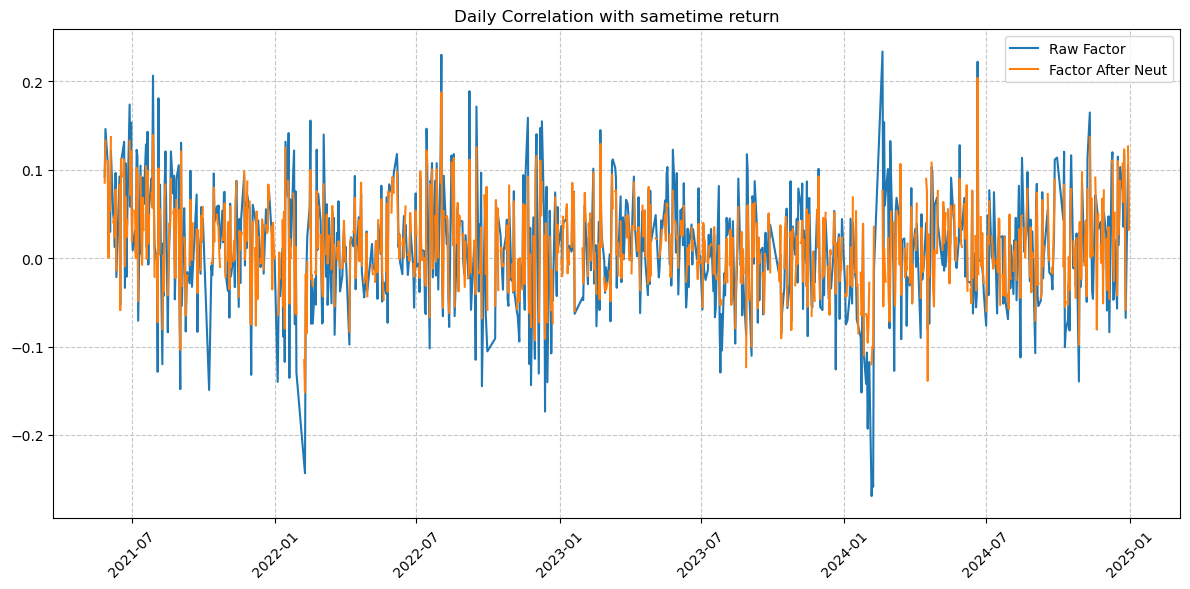

In [12]:
file_path = "/data/home/lexuanchen/Factors/Order/Signal/rolling_early_order_size_ratio.csv"
raw_factor = pd.read_csv(file_path)
debug_path = "/data/home/lexuanchen/Factors/Order/Signal/debug_early_order_size_ratio.parquet"
debug_factor = pd.read_parquet(debug_path)
debug_factor.columns=['date','security_code','early_order_size_ratio']

raw_factor['date'] = pd.to_datetime(raw_factor['date'])
debug_factor['date'] = pd.to_datetime(debug_factor['date'])
all_ret['date'] = pd.to_datetime(all_ret['date'])

raw_factor['security_code'] = raw_factor['security_code'].astype(str)
all_ret['security_code'] = all_ret['security_code'].astype(str)
debug_factor['security_code'] = debug_factor['security_code'].astype(str)


merged_raw = pd.merge(
    raw_factor,
    all_ret,
    on = ['date','security_code'],
    how = 'left'
)

merged_debug = pd.merge(
    debug_factor,
    all_ret,
    on = ['date','security_code'],
    how = 'left'
)

daily_corr_raw = merged_raw.groupby('date').apply(lambda x: x['early_order_size_ratio'].corr(x['cum_ret']))
daily_corr_debug = merged_debug.groupby('date').apply(lambda x: x['early_order_size_ratio'].corr(x['cum_ret']))

# 1. 确保日期是日期时间类型而不是字符串
daily_corr_raw.index = pd.to_datetime(daily_corr_raw.index)
daily_corr_debug.index = pd.to_datetime(daily_corr_debug.index)

# 2. 按日期排序
daily_corr_raw = daily_corr_raw.sort_index()
daily_corr_debug = daily_corr_debug.sort_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_corr_raw.index, daily_corr_raw.values, label='Raw Factor')
plt.plot(daily_corr_debug.index, daily_corr_debug.values, label='Factor After Neut')
plt.legend()
plt.title('Daily Correlation with sametime return')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格线提高可读性
plt.tight_layout()


In [15]:
merged_raw = pd.merge(
    merged_raw,
    short_rev,
    on = ['date','security_code'],
    how = 'left'
)

merged_debug = pd.merge(
    merged_debug,
    short_rev,
    on = ['date','security_code'],
    how = 'left'
)

/tmp/ipykernel_1374907/15005944.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_corr_raw = merged_raw.groupby('date').apply(lambda x: x['early_order_size_ratio'].corr(x['short_rev']))
/tmp/ipykernel_1374907/15005944.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_corr_debug = merged_debug.groupby('date').apply(lambda x: x['early_order_size_ratio'].corr(x['short_rev']))


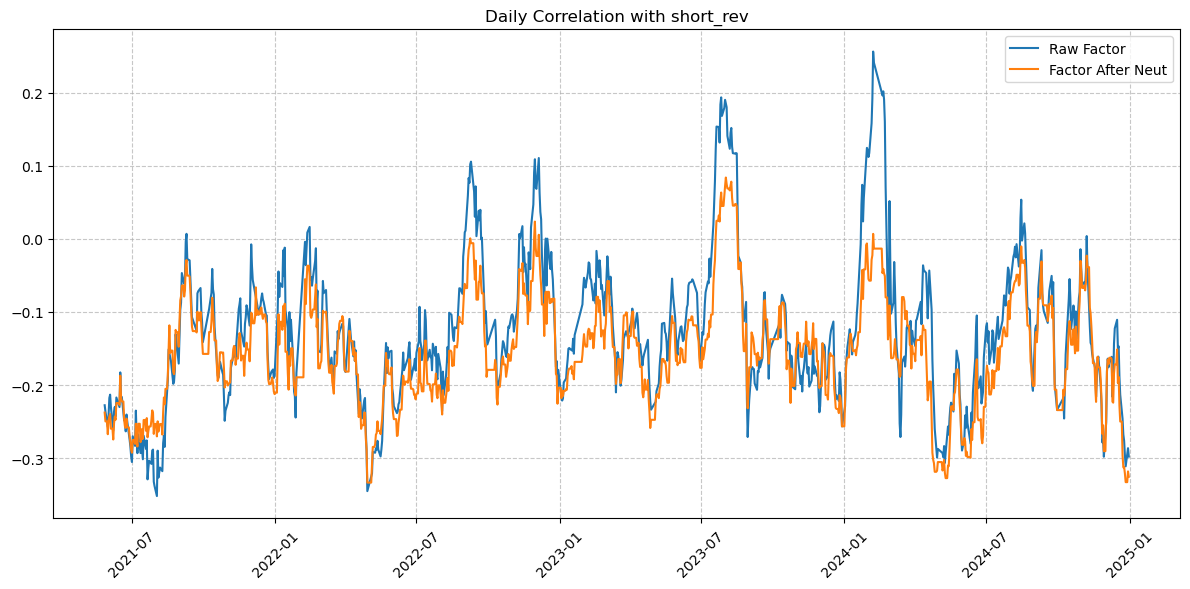

In [17]:
daily_corr_raw = merged_raw.groupby('date').apply(lambda x: x['early_order_size_ratio'].corr(x['short_rev']))
daily_corr_debug = merged_debug.groupby('date').apply(lambda x: x['early_order_size_ratio'].corr(x['short_rev']))

# 1. 确保日期是日期时间类型而不是字符串
daily_corr_raw.index = pd.to_datetime(daily_corr_raw.index)
daily_corr_debug.index = pd.to_datetime(daily_corr_debug.index)

# 2. 按日期排序
daily_corr_raw = daily_corr_raw.sort_index()
daily_corr_debug = daily_corr_debug.sort_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_corr_raw.index, daily_corr_raw.values, label='Raw Factor')
plt.plot(daily_corr_debug.index, daily_corr_debug.values, label='Factor After Neut')
plt.legend()
plt.title('Daily Correlation with short_rev')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格线提高可读性
plt.tight_layout()

/tmp/ipykernel_1374907/1455438510.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data = merged_raw.groupby('date', group_keys=False).apply(analyze_by_date)


统计分析结果:
        Mean Return  Volatility  Sharpe Ratio
decile                                       
1          0.999938    0.008974    111.425006
2          1.000052    0.009034    110.695016
3          1.000259    0.008824    113.352600
4          1.000441    0.008897    112.444334
5          1.000543    0.008763    114.183129
6          1.000685    0.008805    113.646395
7          1.000738    0.008937    111.981548
8          1.000823    0.009117    109.773764
9          1.000788    0.009500    105.344366
10         1.000717    0.009901    101.069236

多空组合统计指标:
平均收益率: 0.000779
波动率: 0.004946
夏普比率: 0.157519


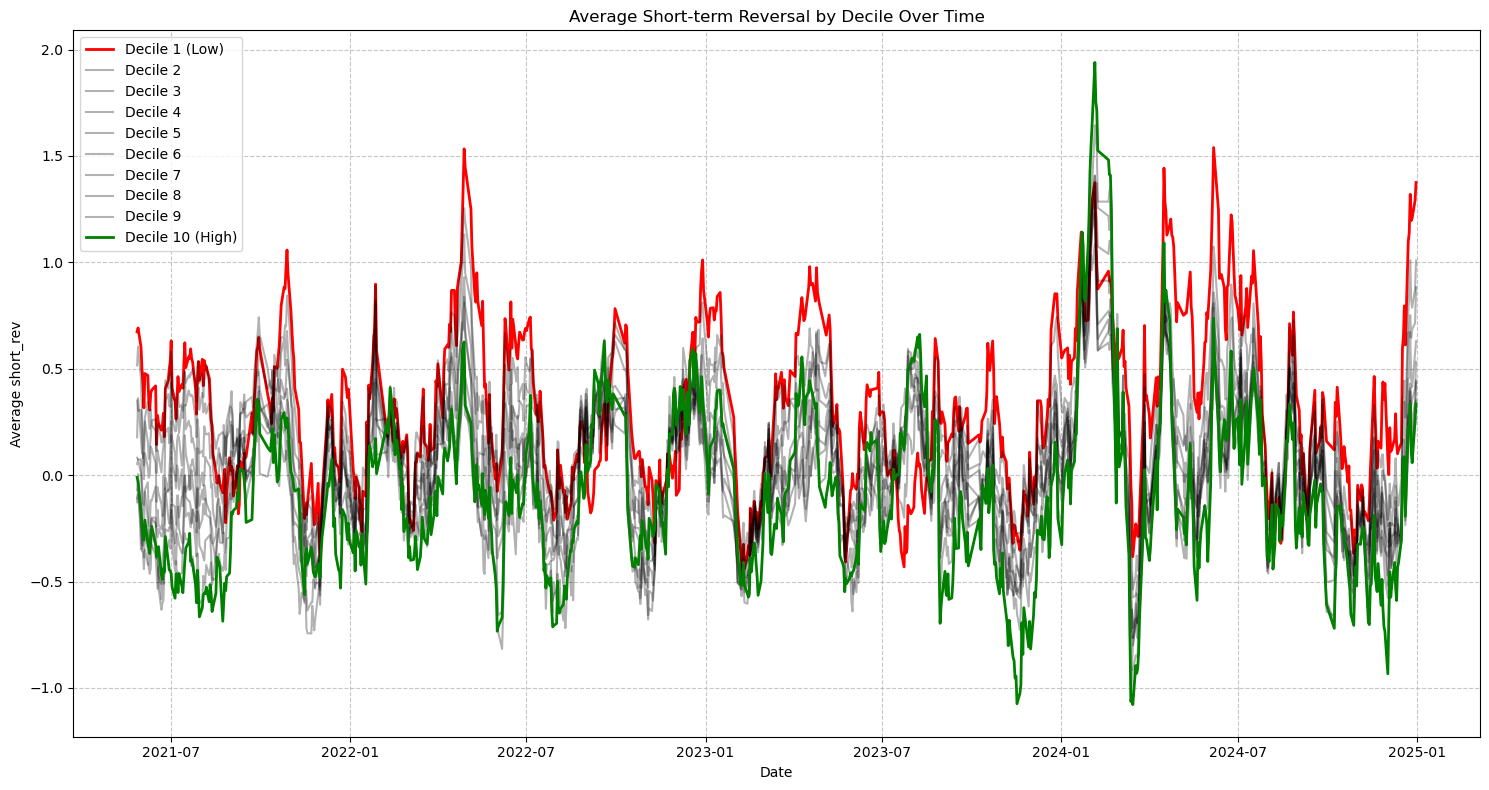

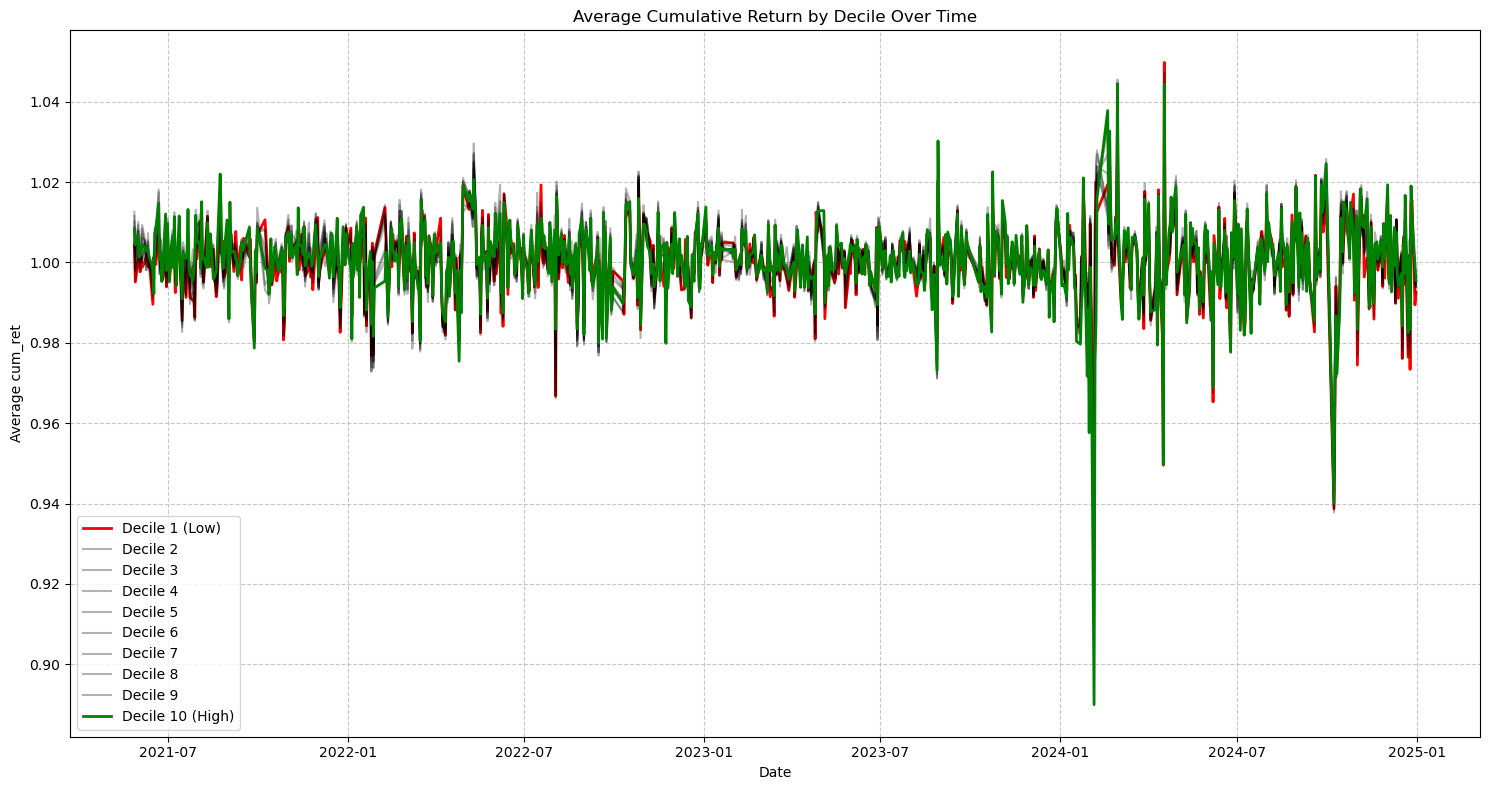

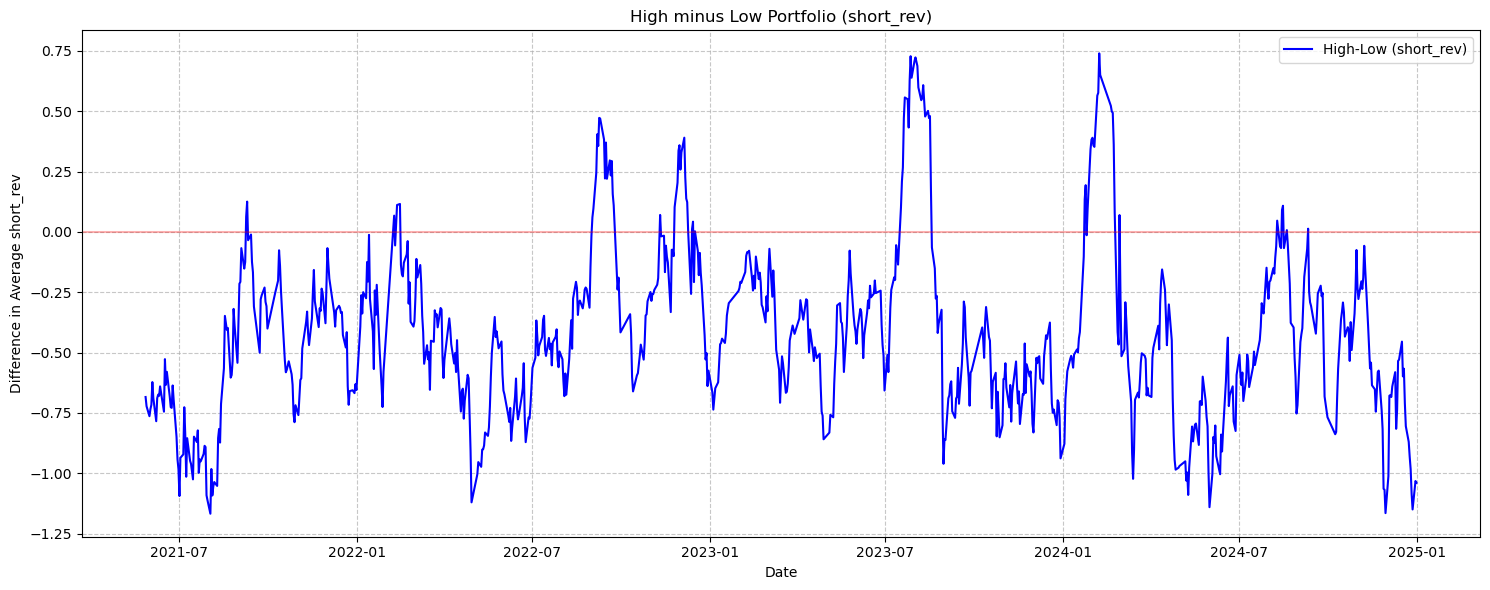

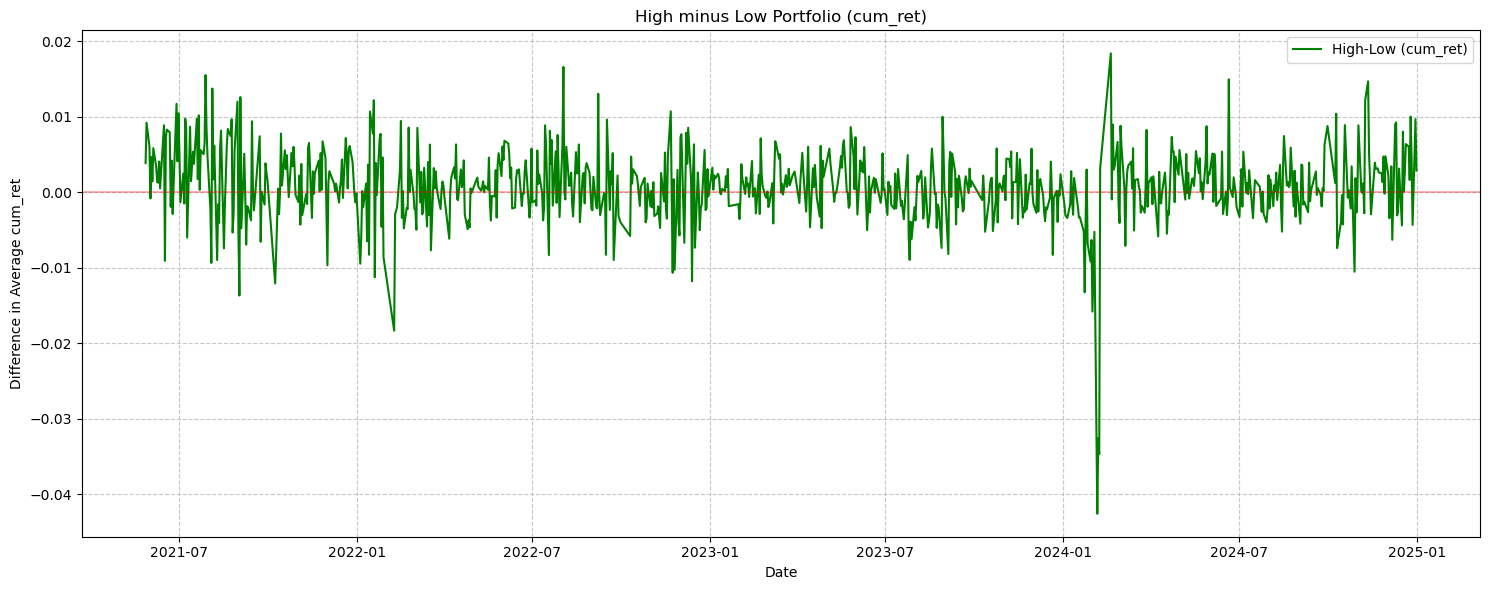

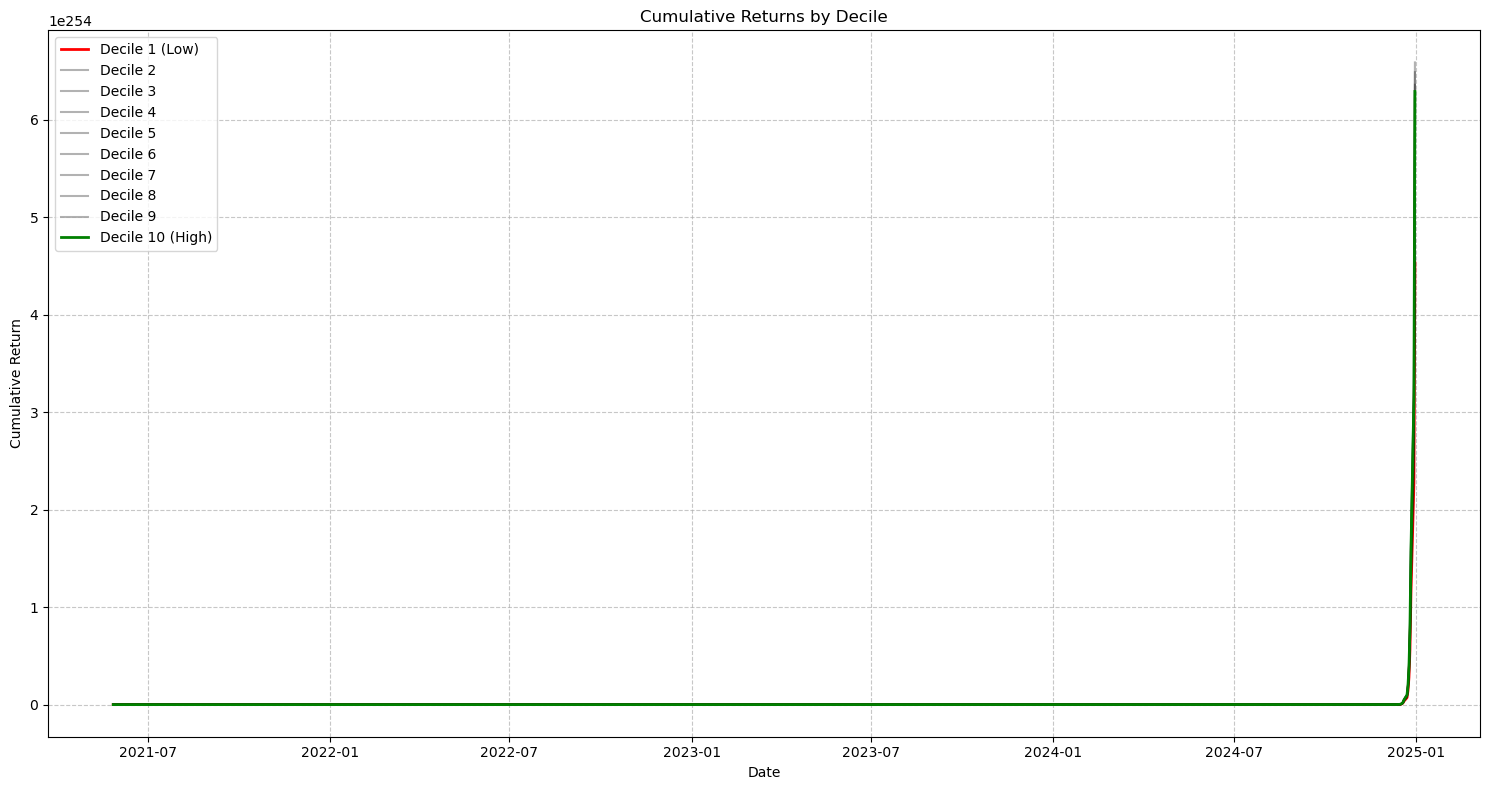

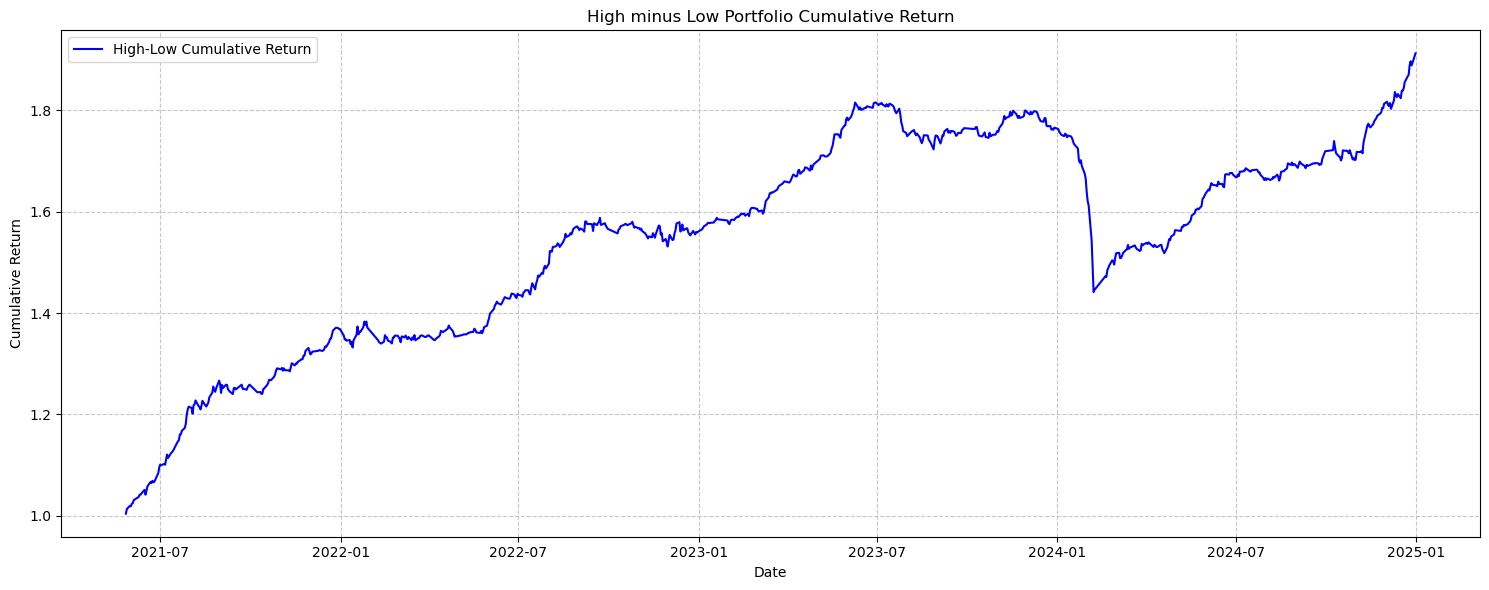

In [18]:
# 确保日期是datetime类型
merged_raw['date'] = pd.to_datetime(merged_raw['date'])

# 按日期分组，然后在每个日期内按early_order_size_ratio分成10组
def analyze_by_date(group):
    # 添加分组标签（1-10）
    group['decile'] = pd.qcut(group['early_order_size_ratio'], 10, labels=False) + 1
    return group

grouped_data = merged_raw.groupby('date', group_keys=False).apply(analyze_by_date)

# 计算每个日期、每个分组的short_rev和cum_ret的均值
decile_means = grouped_data.groupby(['date', 'decile']).agg({
    'short_rev': 'mean',
    'cum_ret': 'mean'
}).reset_index()

# 重新组织数据，便于绘图
decile_means_pivot_short_rev = decile_means.pivot(index='date', columns='decile', values='short_rev')
decile_means_pivot_cum_ret = decile_means.pivot(index='date', columns='decile', values='cum_ret')

# 绘制short_rev随时间的变化趋势
plt.figure(figsize=(15, 8))
for decile in range(1, 11):
    if decile == 1:  # 最低分组
        plt.plot(decile_means_pivot_short_rev.index, decile_means_pivot_short_rev[decile], 
                 'r-', linewidth=2, label=f'Decile {decile} (Low)')
    elif decile == 10:  # 最高分组
        plt.plot(decile_means_pivot_short_rev.index, decile_means_pivot_short_rev[decile], 
                 'g-', linewidth=2, label=f'Decile {decile} (High)')
    else:
        plt.plot(decile_means_pivot_short_rev.index, decile_means_pivot_short_rev[decile], 
                 'k-', alpha=0.3, label=f'Decile {decile}')

plt.title('Average Short-term Reversal by Decile Over Time')
plt.xlabel('Date')
plt.ylabel('Average short_rev')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 绘制cum_ret随时间的变化趋势
plt.figure(figsize=(15, 8))
for decile in range(1, 11):
    if decile == 1:  # 最低分组
        plt.plot(decile_means_pivot_cum_ret.index, decile_means_pivot_cum_ret[decile], 
                 'r-', linewidth=2, label=f'Decile {decile} (Low)')
    elif decile == 10:  # 最高分组
        plt.plot(decile_means_pivot_cum_ret.index, decile_means_pivot_cum_ret[decile], 
                 'g-', linewidth=2, label=f'Decile {decile} (High)')
    else:
        plt.plot(decile_means_pivot_cum_ret.index, decile_means_pivot_cum_ret[decile], 
                 'k-', alpha=0.3, label=f'Decile {decile}')

plt.title('Average Cumulative Return by Decile Over Time')
plt.xlabel('Date')
plt.ylabel('Average cum_ret')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 计算多空组合(High minus Low)的收益
high_minus_low_short_rev = decile_means_pivot_short_rev[10] - decile_means_pivot_short_rev[1]
high_minus_low_cum_ret = decile_means_pivot_cum_ret[10] - decile_means_pivot_cum_ret[1]

# 绘制多空组合的收益
plt.figure(figsize=(15, 6))
plt.plot(high_minus_low_short_rev.index, high_minus_low_short_rev, 'b-', label='High-Low (short_rev)')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('High minus Low Portfolio (short_rev)')
plt.xlabel('Date')
plt.ylabel('Difference in Average short_rev')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.figure(figsize=(15, 6))
plt.plot(high_minus_low_cum_ret.index, high_minus_low_cum_ret, 'g-', label='High-Low (cum_ret)')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('High minus Low Portfolio (cum_ret)')
plt.xlabel('Date')
plt.ylabel('Difference in Average cum_ret')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 计算累积收益
cumulative_returns = (1 + decile_means_pivot_cum_ret).cumprod()

# 绘制累积收益曲线
plt.figure(figsize=(15, 8))
for decile in range(1, 11):
    if decile == 1:  # 最低分组
        plt.plot(cumulative_returns.index, cumulative_returns[decile], 
                 'r-', linewidth=2, label=f'Decile {decile} (Low)')
    elif decile == 10:  # 最高分组
        plt.plot(cumulative_returns.index, cumulative_returns[decile], 
                 'g-', linewidth=2, label=f'Decile {decile} (High)')
    else:
        plt.plot(cumulative_returns.index, cumulative_returns[decile], 
                 'k-', alpha=0.3, label=f'Decile {decile}')

plt.title('Cumulative Returns by Decile')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 计算多空组合的累积收益
high_minus_low_cumulative = (1 + high_minus_low_cum_ret).cumprod()

plt.figure(figsize=(15, 6))
plt.plot(high_minus_low_cumulative.index, high_minus_low_cumulative, 'b-', label='High-Low Cumulative Return')
plt.title('High minus Low Portfolio Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 统计分析
# 计算各分组的平均收益率和波动率
mean_returns = decile_means_pivot_cum_ret.mean()
volatility = decile_means_pivot_cum_ret.std()
sharpe = mean_returns / volatility

stats_df = pd.DataFrame({
    'Mean Return': mean_returns,
    'Volatility': volatility,
    'Sharpe Ratio': sharpe
})

print("统计分析结果:")
print(stats_df)

# 计算多空组合的统计指标
hml_mean = high_minus_low_cum_ret.mean()
hml_vol = high_minus_low_cum_ret.std()
hml_sharpe = hml_mean / hml_vol

print("\n多空组合统计指标:")
print(f"平均收益率: {hml_mean:.6f}")
print(f"波动率: {hml_vol:.6f}")
print(f"夏普比率: {hml_sharpe:.6f}")


In [ ]:
factor_dir= "/data/home/lexuanchen/.conda/envs/factors/early_order_size_ratio"
parquet_pattern = os.path.join(factor_dir, "*.parquet")
parquet_files = glob.glob(parquet_pattern)
print(f"在目录 {factor_dir} 中找到 {len(parquet_files)} 个Parquet文件")


conn = duckdb.connect(database=':memory:')
daily_factor_data = conn.execute(f"""
    SELECT * FROM read_parquet('{parquet_pattern}')
""").fetchdf()
conn.close()

# daily_factor_data.columns=['date','security_code','early_order_size_ratio']

在目录 /data/home/lexuanchen/.conda/envs/factors/early_order_size_ratio 中找到 853 个Parquet文件


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [8]:
daily_factor_data.columns=['security_code','early_order_size_ratio','date']

In [9]:
daily_factor_data.head()

,security_code,early_order_size_ratio,date
0,300841,-0.249135,20210518
1,002703,-0.154707,20210518
2,002866,0.418903,20210518
3,002805,0.118223,20210518
4,000035,-1.070661,20210518


In [10]:
all_ret['date'] = pd.to_datetime(all_ret['date'])
all_ret['security_code'] = all_ret['security_code'].astype(str)
daily_factor_data['date'] = pd.to_datetime(daily_factor_data['date'])
daily_factor_data['security_code'] = daily_factor_data['security_code'].astype(str)

merged_raw = pd.merge(
    all_ret,
    daily_factor_data,
    on=['date','security_code'],
    how='inner'
)

/tmp/ipykernel_2647759/1335864458.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data = merged_raw.groupby('date', group_keys=False).apply(analyze_by_date)


统计分析结果:
        Mean Return  Volatility  Sharpe Ratio
decile                                       
1.0        0.996179    0.009913    100.488175
2.0        0.996378    0.009721    102.492830
3.0        0.997374    0.009113    109.448808
4.0        0.998562    0.008745    114.184932
5.0        0.999864    0.008475    117.979730
6.0        1.001132    0.008280    120.904636
7.0        1.002339    0.008339    120.196979
8.0        1.003347    0.008569    117.084616
9.0        1.003606    0.008936    112.311485
10.0       1.006547    0.009622    104.605629

多空组合统计指标:
平均收益率: 0.010368
波动率: 0.006779
夏普比率: 1.529540


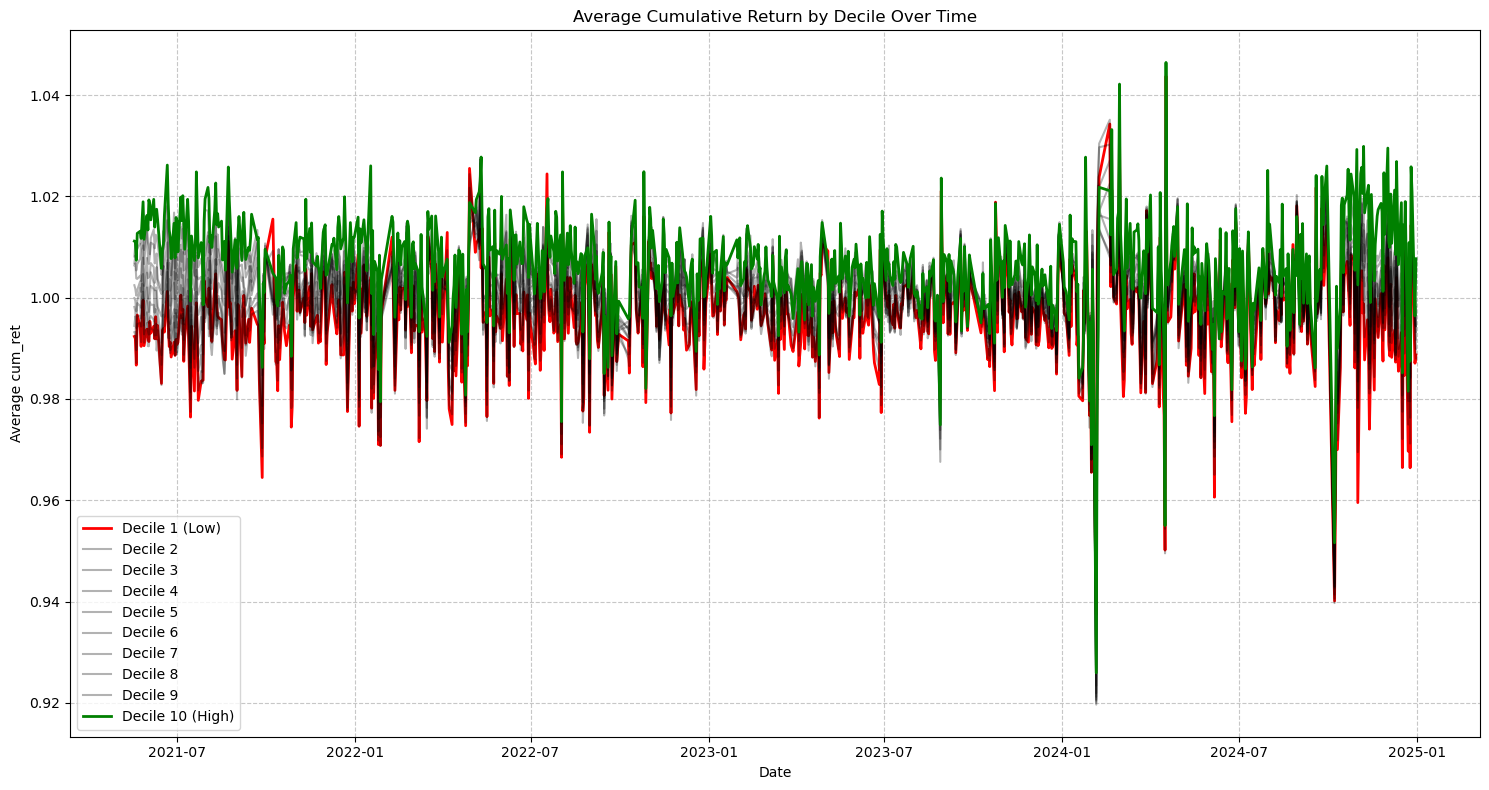

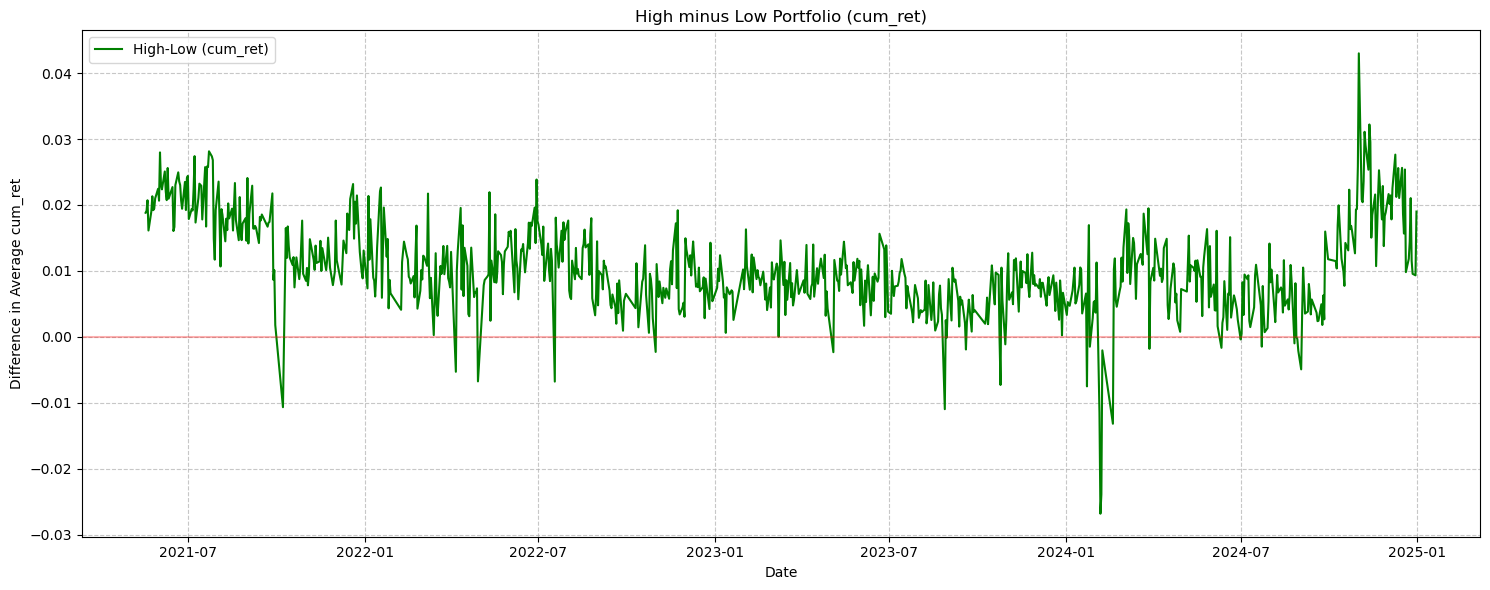

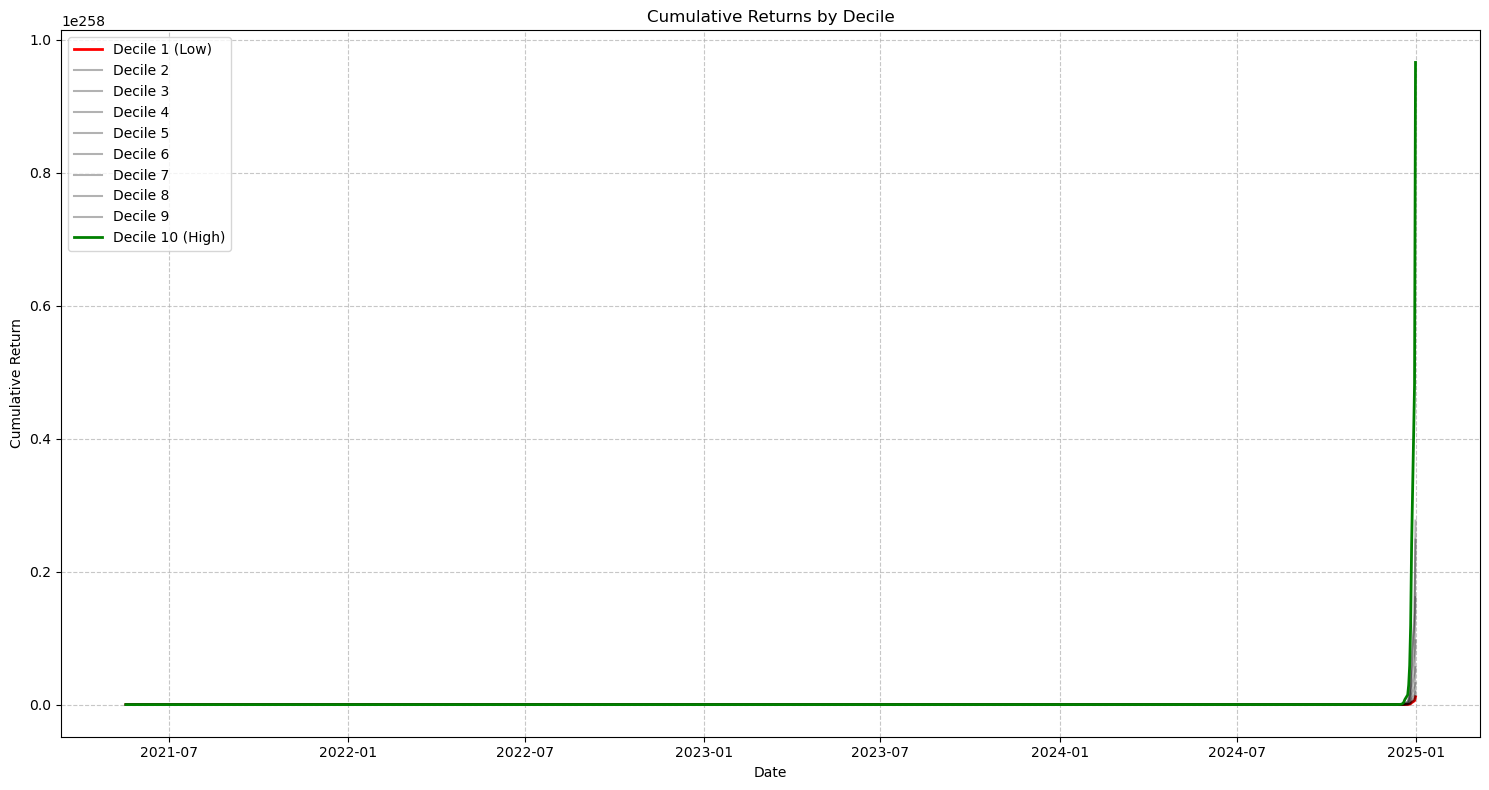

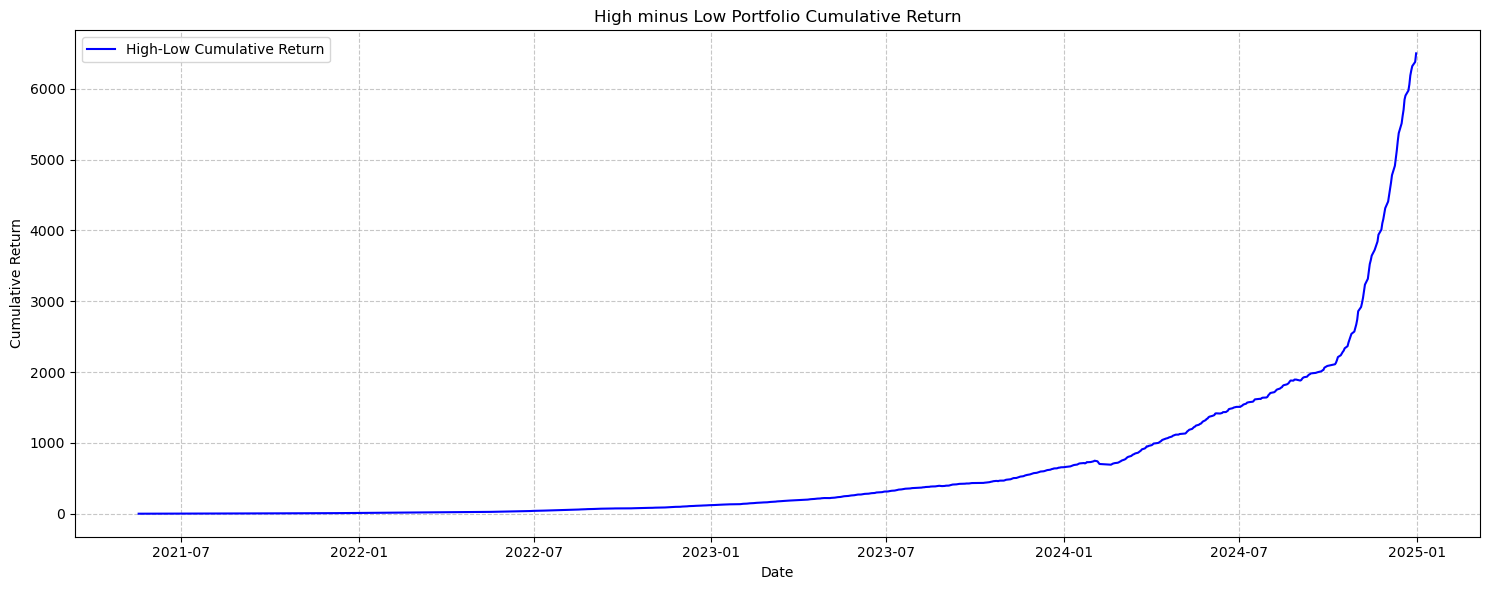

In [11]:
# 确保日期是datetime类型
merged_raw['date'] = pd.to_datetime(merged_raw['date'])

# 按日期分组，然后在每个日期内按early_order_size_ratio分成10组
def analyze_by_date(group):
    # 添加分组标签（1-10）
    group['decile'] = pd.qcut(group['early_order_size_ratio'], 10, labels=False) + 1
    return group

grouped_data = merged_raw.groupby('date', group_keys=False).apply(analyze_by_date)

# 计算每个日期、每个分组的short_rev和cum_ret的均值
decile_means = grouped_data.groupby(['date', 'decile']).agg({
    'cum_ret': 'mean'
}).reset_index()

# 重新组织数据，便于绘图
# decile_means_pivot_short_rev = decile_means.pivot(index='date', columns='decile', values='short_rev')
decile_means_pivot_cum_ret = decile_means.pivot(index='date', columns='decile', values='cum_ret')


# 绘制cum_ret随时间的变化趋势
plt.figure(figsize=(15, 8))
for decile in range(1, 11):
    if decile == 1:  # 最低分组
        plt.plot(decile_means_pivot_cum_ret.index, decile_means_pivot_cum_ret[decile], 
                 'r-', linewidth=2, label=f'Decile {decile} (Low)')
    elif decile == 10:  # 最高分组
        plt.plot(decile_means_pivot_cum_ret.index, decile_means_pivot_cum_ret[decile], 
                 'g-', linewidth=2, label=f'Decile {decile} (High)')
    else:
        plt.plot(decile_means_pivot_cum_ret.index, decile_means_pivot_cum_ret[decile], 
                 'k-', alpha=0.3, label=f'Decile {decile}')

plt.title('Average Cumulative Return by Decile Over Time')
plt.xlabel('Date')
plt.ylabel('Average cum_ret')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 计算多空组合(High minus Low)的收益
# high_minus_low_short_rev = decile_means_pivot_short_rev[10] - decile_means_pivot_short_rev[1]
high_minus_low_cum_ret = decile_means_pivot_cum_ret[10] - decile_means_pivot_cum_ret[1]

# 绘制多空组合的收益

plt.figure(figsize=(15, 6))
plt.plot(high_minus_low_cum_ret.index, high_minus_low_cum_ret, 'g-', label='High-Low (cum_ret)')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('High minus Low Portfolio (cum_ret)')
plt.xlabel('Date')
plt.ylabel('Difference in Average cum_ret')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 计算累积收益
cumulative_returns = (1 + decile_means_pivot_cum_ret).cumprod()

# 绘制累积收益曲线
plt.figure(figsize=(15, 8))
for decile in range(1, 11):
    if decile == 1:  # 最低分组
        plt.plot(cumulative_returns.index, cumulative_returns[decile], 
                 'r-', linewidth=2, label=f'Decile {decile} (Low)')
    elif decile == 10:  # 最高分组
        plt.plot(cumulative_returns.index, cumulative_returns[decile], 
                 'g-', linewidth=2, label=f'Decile {decile} (High)')
    else:
        plt.plot(cumulative_returns.index, cumulative_returns[decile], 
                 'k-', alpha=0.3, label=f'Decile {decile}')

plt.title('Cumulative Returns by Decile')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 计算多空组合的累积收益
high_minus_low_cumulative = (1 + high_minus_low_cum_ret).cumprod()

plt.figure(figsize=(15, 6))
plt.plot(high_minus_low_cumulative.index, high_minus_low_cumulative, 'b-', label='High-Low Cumulative Return')
plt.title('High minus Low Portfolio Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 统计分析
# 计算各分组的平均收益率和波动率
mean_returns = decile_means_pivot_cum_ret.mean()
volatility = decile_means_pivot_cum_ret.std()
sharpe = mean_returns / volatility

stats_df = pd.DataFrame({
    'Mean Return': mean_returns,
    'Volatility': volatility,
    'Sharpe Ratio': sharpe
})

print("统计分析结果:")
print(stats_df)

# 计算多空组合的统计指标
hml_mean = high_minus_low_cum_ret.mean()
hml_vol = high_minus_low_cum_ret.std()
hml_sharpe = hml_mean / hml_vol

print("\n多空组合统计指标:")
print(f"平均收益率: {hml_mean:.6f}")
print(f"波动率: {hml_vol:.6f}")
print(f"夏普比率: {hml_sharpe:.6f}")


/tmp/ipykernel_2647759/1375640793.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_corr_raw = merged_raw.groupby('date').apply(lambda x: x['early_order_size_ratio'].corr(x['cum_ret']))


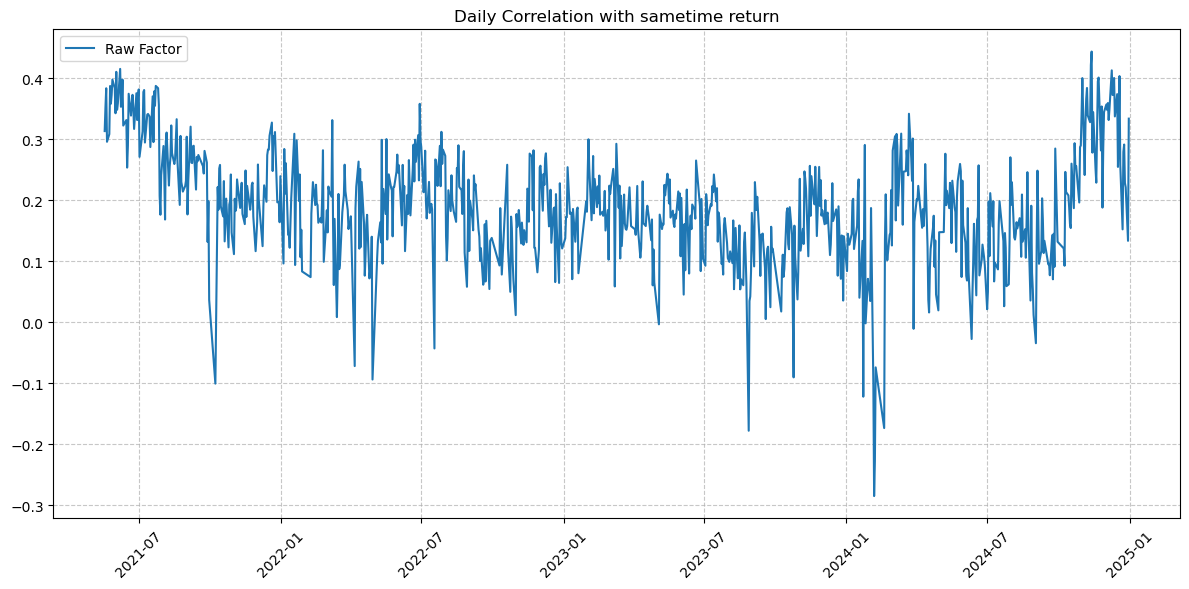

In [13]:
daily_corr_raw = merged_raw.groupby('date').apply(lambda x: x['early_order_size_ratio'].corr(x['cum_ret']))
daily_corr_raw = daily_corr_raw.sort_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_corr_raw.index, daily_corr_raw.values, label='Raw Factor')
plt.legend()
plt.title('Daily Correlation with sametime return')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格线提高可读性
plt.tight_layout()


In [16]:
file_path = "./factors/cumret9301030.parquet"

all_ret.to_parquet(file_path,index=False)